In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('data/fabio.xlsx', sheet_name='dataset_deflacionado', na_values=['-', ' '])
df = df.drop(columns=['Apresentação comercial'])

df.head()


,Princípio ativo,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Acetato de Glatirâmer 20 mg/ml,NaN,6051.8,5874.41,5813.5,5901.92,5518.88,5496.17,5616.49,5657.05,6197.38,6095.29,5889.81,5759.65
1,NaN,1,1,1,1,1,1,1,1,1,1,1,2,2
2,NaN,1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N); 1 (S),1 (N); 1 (S); 1 (G),1 (N); 1 (S); 1 (G)
3,Adalimumabe 40 mg,NaN,9489.27,9423.53,9325.83,9467.67,8853.19,8784.08,8976.37,NaN,3193.31,3140.69,2539.46,2483.34
4,NaN,1,1,1,1,2,2,2,2,0,2,2,3,4


Separar Preço e quantidade de empresas

In [4]:
df_valor = df.iloc[::3].reset_index(drop=True) # Valor deflacionado do medicamento
df_reg = df.iloc[1::3].reset_index(drop=True) # Quanditade de empresas
df_reg['Princípio ativo'] = df_valor['Princípio ativo']
df_q_med = df.iloc[2::3].reset_index(drop=True) # Representam a quantidade de registros
df_q_med['Princípio ativo'] = df_valor['Princípio ativo']


In [5]:
print(df_valor.shape)
df_valor.head()

(82, 14)


,Princípio ativo,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Acetato de Glatirâmer 20 mg/ml,NaN,6051.8,5874.41,5813.5,5901.92,5518.88,5496.17,5616.49,5657.05,6197.38,6095.29,5889.81,5759.65
1,Adalimumabe 40 mg,NaN,9489.27,9423.53,9325.83,9467.67,8853.19,8784.08,8976.37,NaN,3193.31,3140.69,2539.46,2483.34
2,Alfataliglicerase 200Ui,NaN,NaN,2509.12,2215.39,2249.09,1864.71,1850.14,1890.63,1904.29,2034.92,2001.4,1933.93,1891.19
3,Atazanavir 300 mg,1695.02,1663.9,1615.12,799.19,385.7,360.67,357.84,365.67,368.31,393.58,387.1,374.04,365.78
4,Betainterferona 1A 22 mcg/ml,NaN,11290.34,10959.37,10845.75,11010.73,10296.12,10253.75,10478.19,4097.07,4378.14,4306.01,4160.86,4068.91


In [6]:
print(df_reg.shape)
df_reg.head()

(82, 14)


,Princípio ativo,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Acetato de Glatirâmer 20 mg/ml,1,1,1,1,1,1,1,1,1,1,1,2,2
1,Adalimumabe 40 mg,1,1,1,1,2,2,2,2,0,2,2,3,4
2,Alfataliglicerase 200Ui,0,0,1,1,1,2,2,1,1,1,1,1,1
3,Atazanavir 300 mg,1,1,1,2,2,2,2,2,2,2,2,2,2
4,Betainterferona 1A 22 mcg/ml,1,1,1,1,1,1,1,1,2,2,2,2,2


In [7]:
print(df_q_med.shape)
df_q_med.head()

(82, 14)


,Princípio ativo,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Acetato de Glatirâmer 20 mg/ml,1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N); 1 (S),1 (N); 1 (S); 1 (G),1 (N); 1 (S); 1 (G)
1,Adalimumabe 40 mg,0,0,1 (B),1 (B),1 (B),1 (B),1 (B),3 (B),5 (B),5 (B),6 (B),11 (B),12 (B)
2,Alfataliglicerase 200Ui,0,0,1 (B),1 (B),1 (B),1 (B),1 (B),1 (B),1 (B),1 (B),1 (B),1 (B),1 (B)
3,Atazanavir 300 mg,1 (N),1 (N),1 (N); 1 (G),1 (N); 1 (G),1 (N); 1 (G),1 (N); 1 (G),1 (N); 1 (G),1 (N); 1 (G),1 (N); 1 (G),1 (N); 1 (G),1 (N); 1 (G),1 (N); 1 (G),1 (N); 1 (G)
4,Betainterferona 1A 22 mcg/ml,2 (B),2 (B),2 (B),2 (B),3 (B),3 (B),3 (B),3 (B),3 (B),3 (B),3 (B),3 (B),3 (B)


**Empilhar**

In [8]:
df_reg_long = df_reg.melt(id_vars='Princípio ativo', var_name='Ano', value_name='N')
df_reg_long.head()

,Princípio ativo,Ano,N
0,Acetato de Glatirâmer 20 mg/ml,2012,1
1,Adalimumabe 40 mg,2012,1
2,Alfataliglicerase 200Ui,2012,0
3,Atazanavir 300 mg,2012,1
4,Betainterferona 1A 22 mcg/ml,2012,1


In [9]:
df_valor_long = df_valor.melt(id_vars='Princípio ativo', var_name='Ano', value_name='Preço')
df_valor_long.head()

,Princípio ativo,Ano,Preço
0,Acetato de Glatirâmer 20 mg/ml,2012,NaN
1,Adalimumabe 40 mg,2012,NaN
2,Alfataliglicerase 200Ui,2012,NaN
3,Atazanavir 300 mg,2012,1695.02
4,Betainterferona 1A 22 mcg/ml,2012,NaN


In [10]:
df_q_med_long = df_q_med.melt(id_vars='Princípio ativo', var_name='Ano', value_name='label')
print(df_q_med_long.shape)
# Tratar registros somar quantidade de registros de medicamentos
regsitros_tratados = df_q_med_long['label'].str.extractall(r'(\d+)')\
    .astype(int)\
    .groupby(level=0).sum()

df_q_med_long['Registros'] = regsitros_tratados

df_q_med_long.head()


(1066, 3)


,Princípio ativo,Ano,label,Registros
0,Acetato de Glatirâmer 20 mg/ml,2012,1 (N),1.0
1,Adalimumabe 40 mg,2012,0,NaN
2,Alfataliglicerase 200Ui,2012,0,NaN
3,Atazanavir 300 mg,2012,1 (N),1.0
4,Betainterferona 1A 22 mcg/ml,2012,2 (B),2.0


**Consolidar**

In [11]:
pd.set_option('future.no_silent_downcasting', True)

df_valor_long['N'] = df_reg_long['N']
df_valor_long['Registros'] = df_q_med_long['Registros']
df_valor_long['label_registros'] = df_q_med_long['label']

df_consolidado = df_valor_long.sort_values(['Princípio ativo','Ano']).copy()
df_consolidado["Ano"] = df_consolidado["Ano"].astype(str).apply(lambda x: x[2:])
# df_consolidado.fillna(0, inplace=True)
df_consolidado.head()

,Princípio ativo,Ano,Preço,N,Registros,label_registros
0,Acetato de Glatirâmer 20 mg/ml,12,NaN,1,1.0,1 (N)
82,Acetato de Glatirâmer 20 mg/ml,13,6051.8,1,1.0,1 (N)
164,Acetato de Glatirâmer 20 mg/ml,14,5874.41,1,1.0,1 (N)
246,Acetato de Glatirâmer 20 mg/ml,15,5813.5,1,1.0,1 (N)
328,Acetato de Glatirâmer 20 mg/ml,16,5901.92,1,1.0,1 (N)


Data referência registro sus

| Cor / Estilo               | Significado                                   | Sigla Sugerida |
|----------------------------|-----------------------------------------------|----------------|
| Amarelo                    | Registro IP (Instituição Pública)             | IP             |
| Roxo                       | Registro PP (Parceiro Privado)                | PP             |
| Amarelo e Negrito          | Registro IP e primeira aquisição              | IP+PA          |
| Amarelo com Vermelho       | Registro IP e PP no mesmo ano                 | IP+PP          |
| Cinza                      | Primeira aquisição                            | PA             |
| Amarelo, Negrito e Vermelho| IP, PP e primeira aquisição conjuntamente     | IP+PP+PA       |
| Roxo e negrito             | Registro PP e primeira aquisição              | PP+PA          |



In [12]:
data_registro_siglas = pd.read_excel('data/fabio.xlsx', sheet_name='data_registro_siglas_2', na_values='-')
data_registro_siglas = data_registro_siglas.drop(columns=['Apresentação comercial'])
print(data_registro_siglas.shape)
data_registro_siglas.head()


(246, 14)


,Princípio ativo,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Acetato de Glatirâmer 20 mg/ml,NaN,6051.8,5874.41,5813.5,5901.92,5518.88,5496.17,5616.49,5657.05,6197.38,6095.29,5889.81,5759.65
1,NaN,1,1,1,1,1,1,1,1,1,1,1,2,2
2,NaN,1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N),1 (N); 1 (S),1 (N); 1 (S); 1 (G),1 (N); 1 (S); 1 (G)
3,Adalimumabe 40 mg,NaN,9489.27,9423.53,9325.83,9467.67,8853.19,8784.08,8976.37,-,3193.31,3140.69,2539.46,2483.34
4,NaN,1,1,1,1,2,2,2,2,0,2,2,3,4


In [21]:
siglas = ['IP', 'PP', 'IP+PA', 'IP+PP', 'PA', 'IP+PP+PA', 'PP+PA']
df_ano_reg = data_registro_siglas.iloc[2::3].map(lambda x: x if x in siglas else pd.NA).reset_index(drop=True).copy()
# Atribuir principio ativo correspondente 
df_ano_reg['Princípio ativo'] = data_registro_siglas.iloc[0::3]['Princípio ativo'].reset_index(drop=True)

# Pivot
df_ano_pivot = df_ano_reg\
    .melt(id_vars='Princípio ativo', var_name='Ano', value_name='Sigla')\
    .query('Sigla.isin(@siglas)')

df_ano_pivot['Ano'] = df_ano_pivot['Ano'].astype(str).apply(lambda x: x[2:])

df_ano_pivot.head()

df_ano_pivot.query('`Sigla`=="PP+PA"').values
# df_consolidado.query('`Princípio ativo`.str.contains("Everolimo 0,75 mg")')


array([['Mesilato de Imatinibe 100 mg', '13', 'PP+PA'],
       ['Mesilato de Imatinibe 400 mg', '13', 'PP+PA']], dtype=object)

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

from IPython.core.debugger import set_trace

import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

sns.set_theme(style="ticks")



# Função para quebrar texto longo nos títulos
def wrap_title(title, width=20):
    return "\n".join(textwrap.wrap(title, width))


def unique_year(df):
    return sorted(df["Ano"].unique())
    

def year_index(df):
    # Obter os anos únicos e ordená-los
    anos_unicos = unique_year(df)
    ano_to_index = {ano: i for i, ano in enumerate(anos_unicos)}
    return ano_to_index

def add_base_line(df, title, year_to_index, ax):
    ano_refs = df[df['Princípio ativo'] == title][['Ano', 'Sigla']].values
    texts = []
    for ano_ref, sigla in ano_refs:
        if ano_ref in year_to_index:
            x_pos = year_to_index[ano_ref]
            ax.axvline(x=x_pos, linestyle=":", linewidth=1.8, color="#444444")

            # Adicionar anotação "SUS" um pouco acima do gráfico
            res = ax.text(x_pos + 0.1, ax.get_ylim()[1] * 1.1, sigla, color="#444444", fontsize=14, 
                ha="center", 
                va="top",
                bbox=dict(                     # Caixa de fundo para melhor legibilidade
                    facecolor="white", 
                    alpha=0.7, 
                    edgecolor="none", 
                    pad=2.0
                ),
                #   fontweight="bold"
                )
            texts.append(res)
    from adjustText import adjust_text
    adjust_text(texts, ax=ax, expand=(1.2, 2))


class FacetChart:
    def __init__(self, df, col, hue, font_config, df_ano_registro, palette="tab20c", *args, **kwargs):
        self.df = df
        self.col = col
        self.hue = hue
        self.font_config = font_config
        self.df_ano_registro = df_ano_registro
        self.palette = palette
        self.kwargs = kwargs

        
    def _facet_grid(self):
        # Inicializar o FacetGrid
        grid = sns.FacetGrid(
            self.df, col=self.col, **self.kwargs
        )
        return grid
    
    @staticmethod
    def _create_additional_subplot(ax):
        # Criar um subplot adicional abaixo do gráfico atual
        divider = make_axes_locatable(ax)
        ax_sub = divider.append_axes("bottom", size="35%", pad=0.5)
        return ax_sub
    
    def _plot_margin(self, title, ax):
            ax_sub = self._create_additional_subplot(ax)
            
            # Mostrar rótulo a cada 1 ano
            distinc_year = unique_year(self.df)
            labels_show = [ano if i % 2 == 0 else '' for i, ano in enumerate(distinc_year)]
        
            df_filtered = self.df[self.df["Princípio ativo"] == title]

            sns.barplot(x=df_filtered["Ano"], y=df_filtered["N"], ax=ax_sub, color="#E4E4E5", label="Emp.(n)")
            sns.lineplot(x=df_filtered["Ano"], y=df_filtered["Registros"], ax=ax_sub, color="#4D4D4D", linewidth=1, label='Reg.(n)')
            
            ax_sub.legend(fontsize=12,           # tamanho da fonte
                # loc="upper left",      # posição da legenda
                frameon=False,   
                loc='center left',          # Ancoragem da legenda (no centro à esquerda do ponto de ancoragem)
                bbox_to_anchor=(1.02, 0.5), # Define onde a legenda será colocada fora do gráfico
                borderaxespad=0.0       # com caixa ao redor
            ) 

            # Remover borda superior
            ax_sub.spines["top"].set_visible(False)
            
            ax_sub.set_xticks(distinc_year)
            ax_sub.set_xticklabels(labels_show, fontsize=14)
            ax_sub.set_xlabel("Ano", fontsize=self.font_config.get('fontsize') or 14)
            ax_sub.set_ylabel("N", fontsize=self.font_config.get('fontsize') or 14)
            ax_sub.tick_params(axis="y", labelsize=self.font_config.get('fontsize') or 16)


            # ax_sub.set_xticks(distinc_year)
            # ax_sub.set_xticklabels(distinc_year, fontsize=self.font_config.get('fontsize') or 14)
            ax_sub.set_xlim(ax.get_xlim())

        
    
    def subplots(self, save_file):
        grid = self._facet_grid()
        try:
            # Desenhar o gráfico de linha
            grid.map(plt.plot, "Ano", "Preço", marker="o", color="dimgray")
            
            year_to_index = year_index(self.df)
            distinct_year = unique_year(self.df)

            
            
            # Aplicar títulos formatados e adicionar subplots
            for ax, title in zip(grid.axes.flat, grid.col_names):
                ax.set_title(wrap_title(title, width=40), fontsize= self.font_config.get('fontsize') or 16, fontweight="bold", pad=20)  # Ajustar tamanho da fonte
                ax.set_xlabel("")

                        
                add_base_line(self.df_ano_registro, title, year_to_index, ax)
                
                # Ajustar os rótulos do eixo X para os anos reais
                # ax.set_xticks(distinct_year)
                # ax.set_xticklabels([])

                ax.set_xticks(distinct_year)
                labels_show = [ano if i % 2 == 1 else '' for i, ano in enumerate(distinct_year)]
                ax.set_xticklabels(labels_show, fontsize=14)
                ax.margins(x=0.1)
                
                ax.set_ylim(0, None)
                ax.tick_params(axis="y", labelbottom=True, labelsize=self.font_config.get('fontsize') or 16)
                ax.tick_params(labelbottom=True)
                ax.set_ylabel('Preço', fontsize=self.font_config.get('fontsize') or 16)
                                        
                self._plot_margin(title, ax)
        except Exception as e:
            set_trace()

        # 🔹 Ajustes visuais finais
        grid.figure.subplots_adjust(hspace=1.5)  # Espaçamento entre subplots
        grid.figure.tight_layout(w_pad=1)  # Melhor disposição
        
        plt.show()
        
        if save_file:
            grid.savefig(f'{save_file}.jpeg', dpi=600)
        
        return grid

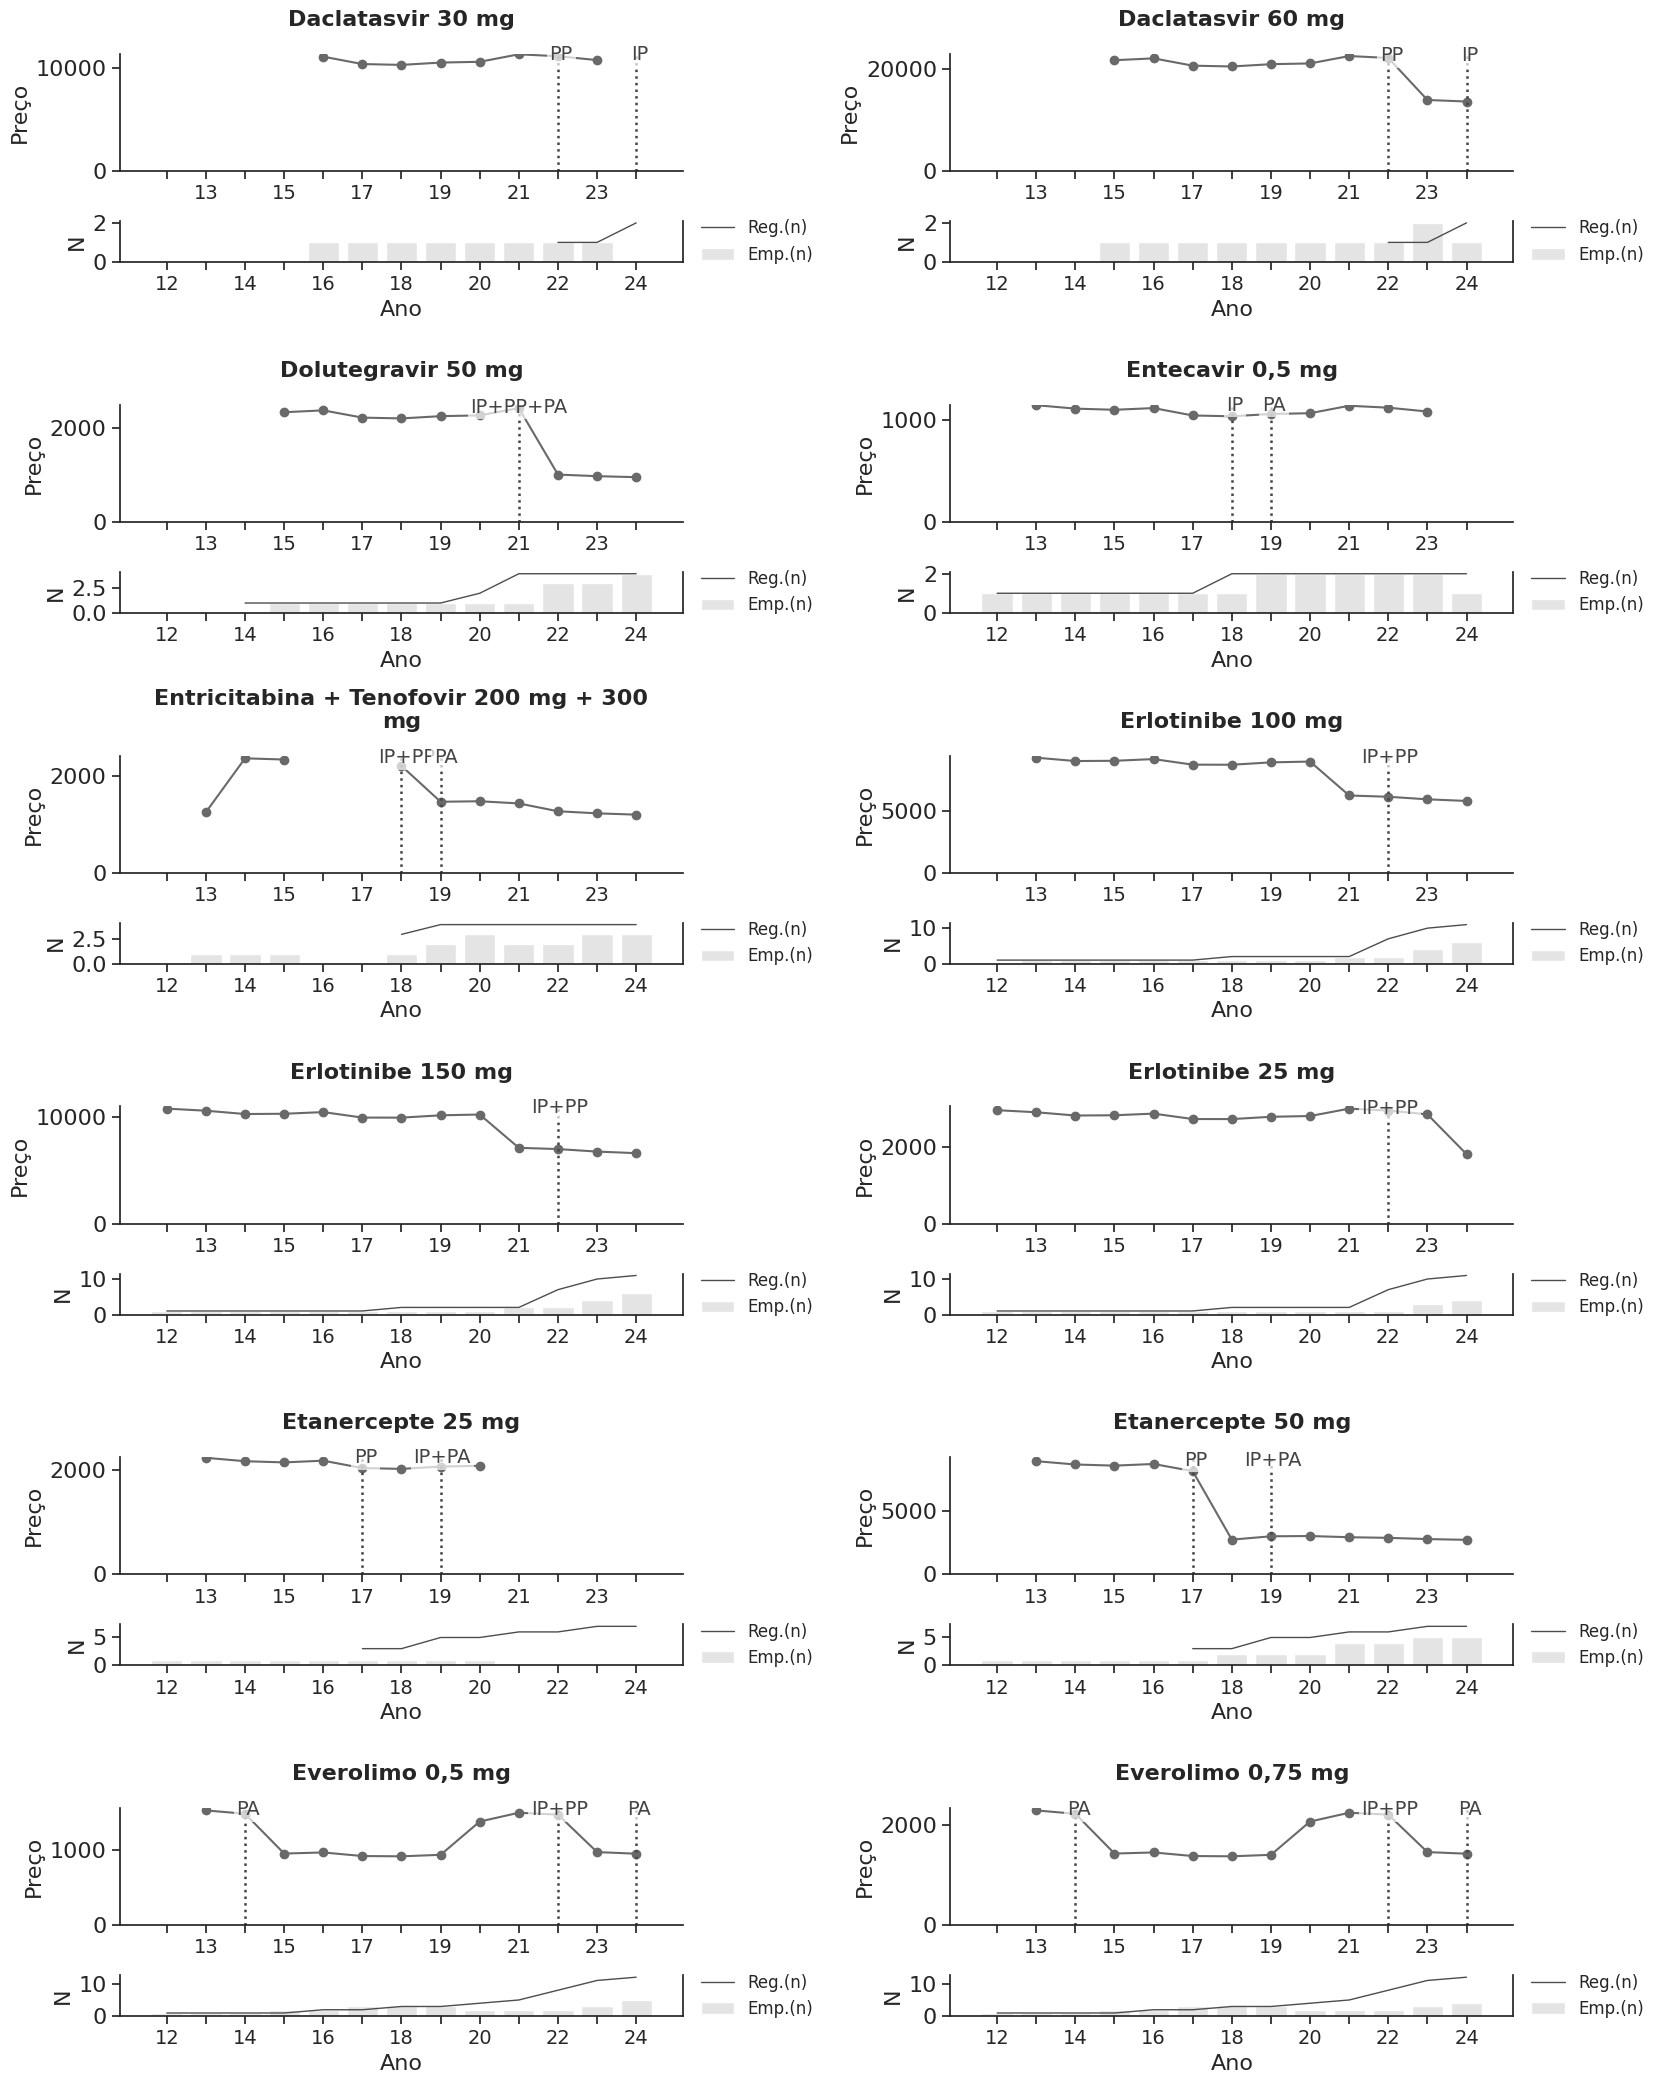

In [15]:
princio_ativo = df_consolidado['Princípio ativo'].unique()
df = df_consolidado[df_consolidado['Princípio ativo'].isin(princio_ativo[12:24])]

charts = FacetChart(
    df = df,
    col="Princípio ativo",
    hue="Princípio ativo",
    font_config={'fontsize':16},
    df_ano_registro=df_ano_pivot,
    palette="tab20c",
    col_wrap=2,
    height=3.5,
    sharey=False, 
    sharex=True, 
    aspect=2.4,
)

charts.subplots(save_file=f'chart_page_teste')

**Ordem** por grupo



In [16]:
df_ordem = pd.read_excel('data/fabio.xlsx', sheet_name='ordem', na_values='-')

df_ordem['Princípio ativo'] = df_ordem['Princípio ativo'].apply(lambda x: x.strip())

grupo_r = df_ordem.query('grupo == "r"')['Princípio ativo'].values

grupo_rf = df_ordem.query('grupo == "rf"')['Princípio ativo'].values

grupo_fb = df_ordem.query('grupo == "fb"')['Princípio ativo'].values

grupo_fc = df_ordem.query('grupo == "fc"')['Princípio ativo'].values


df_ordem.grupo.unique()





array(['fb', 'fc', 'r', 'rf'], dtype=object)

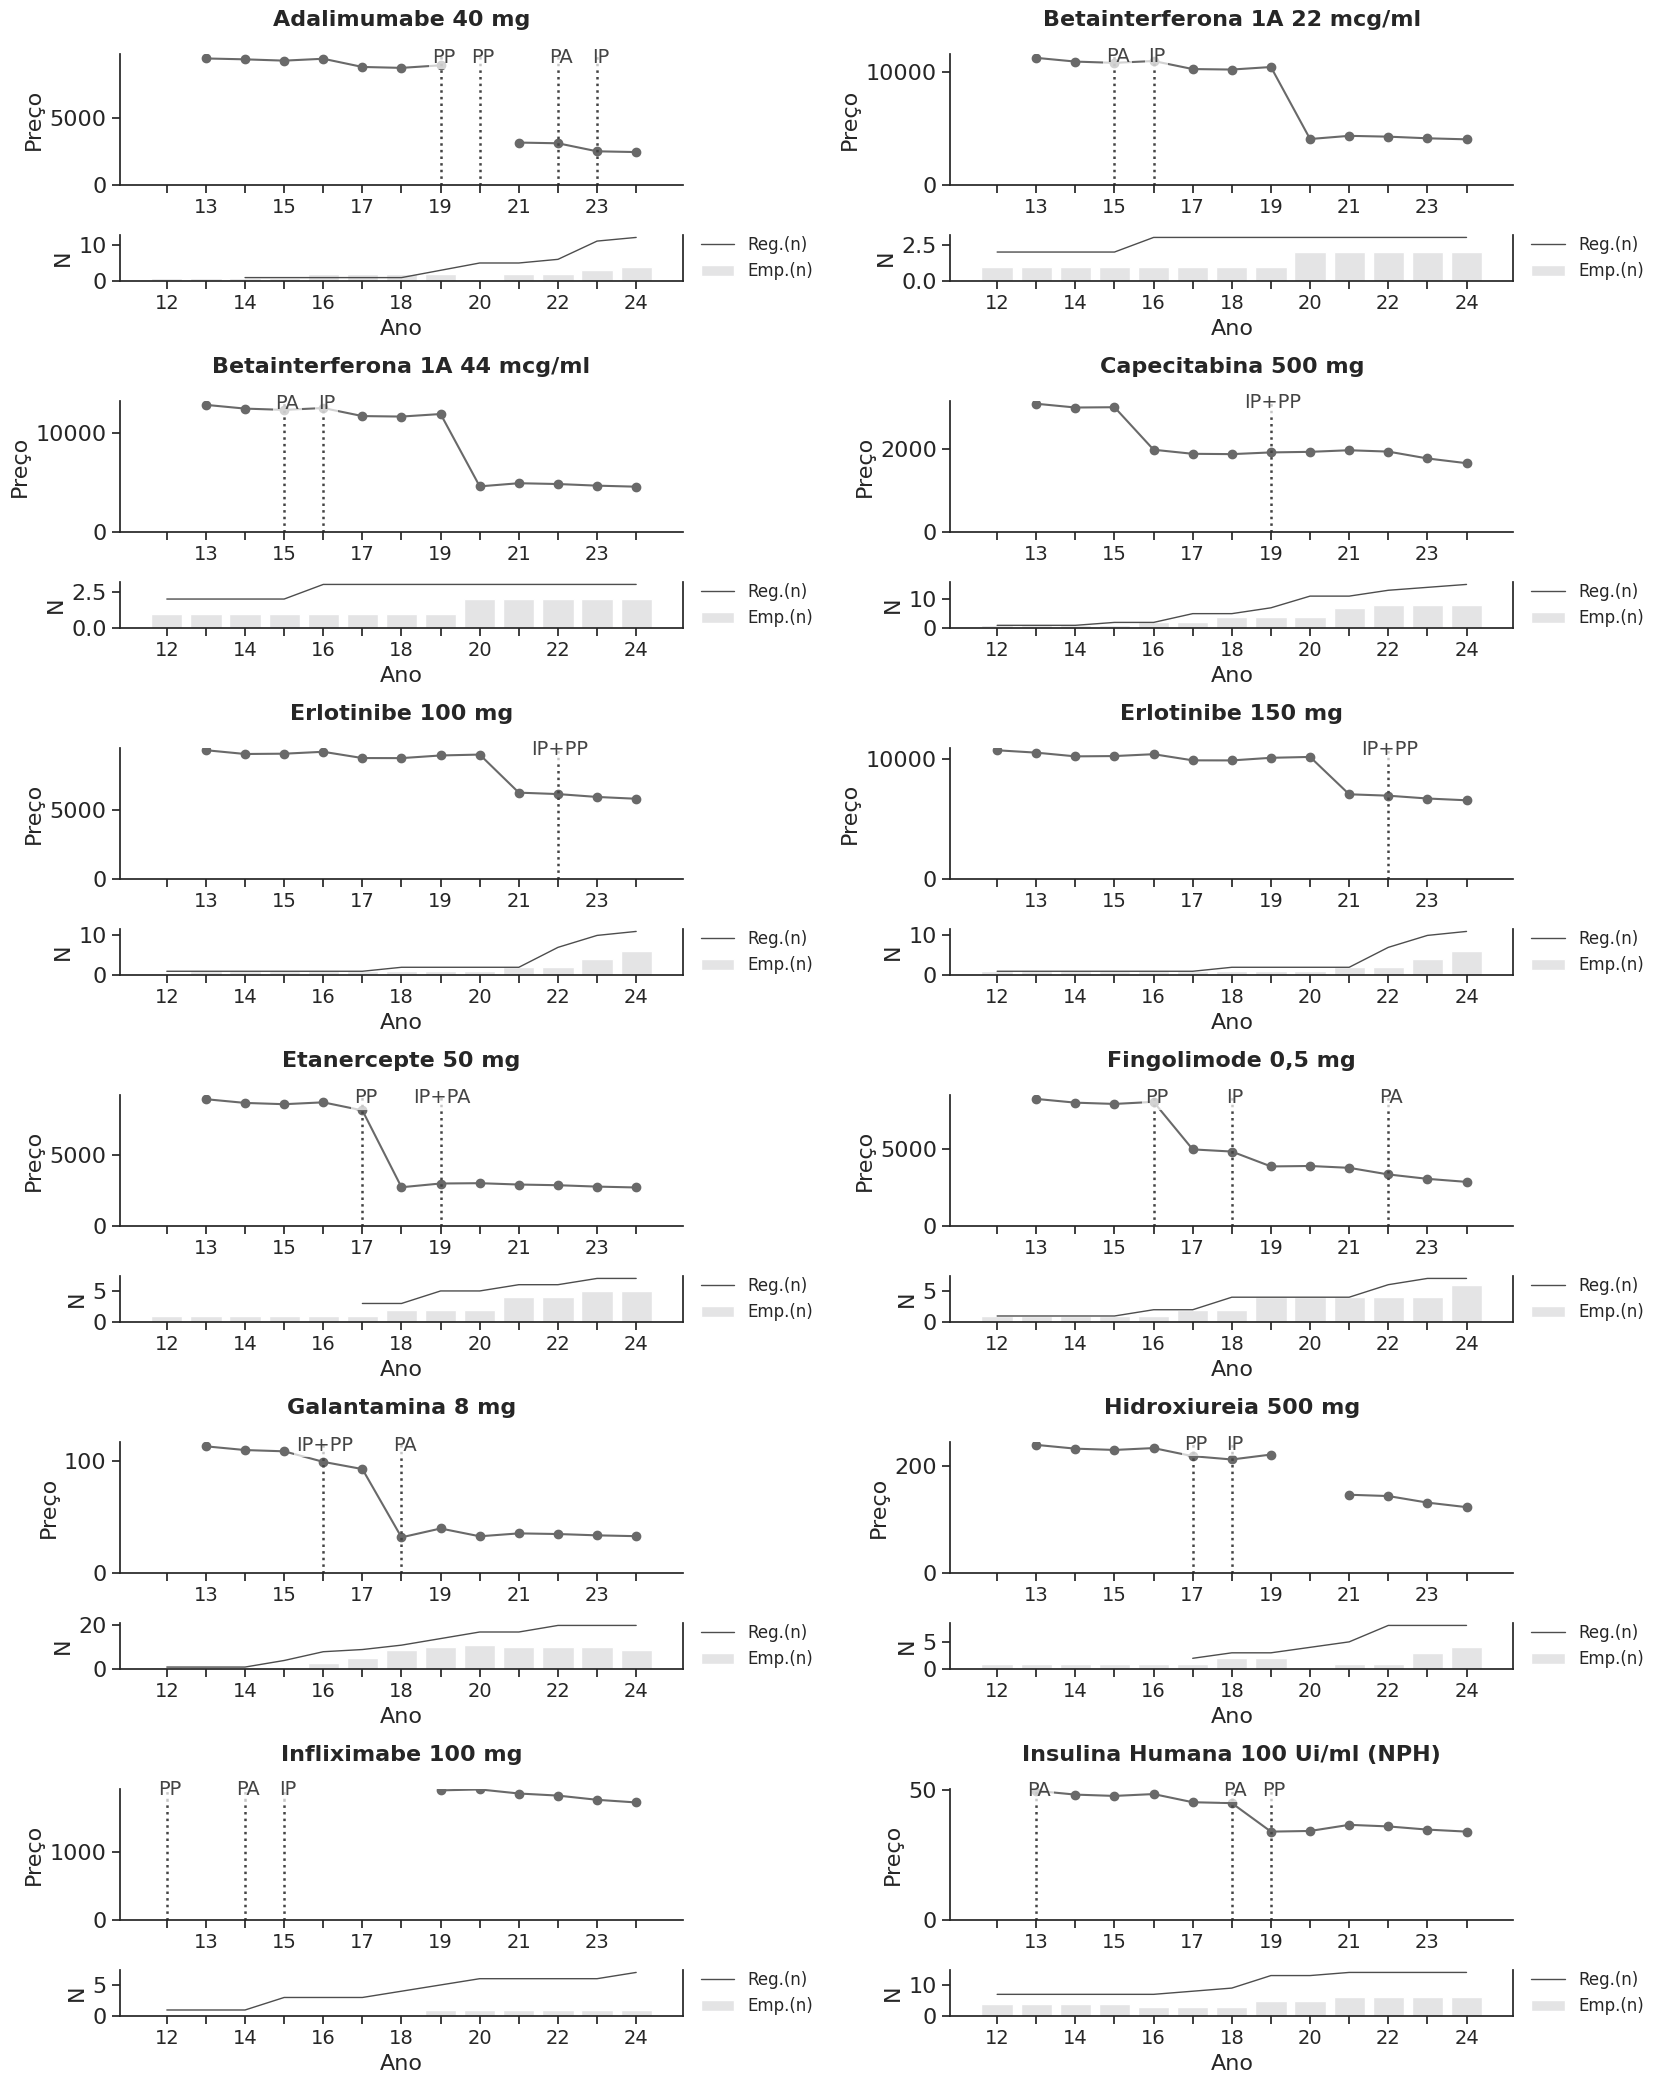

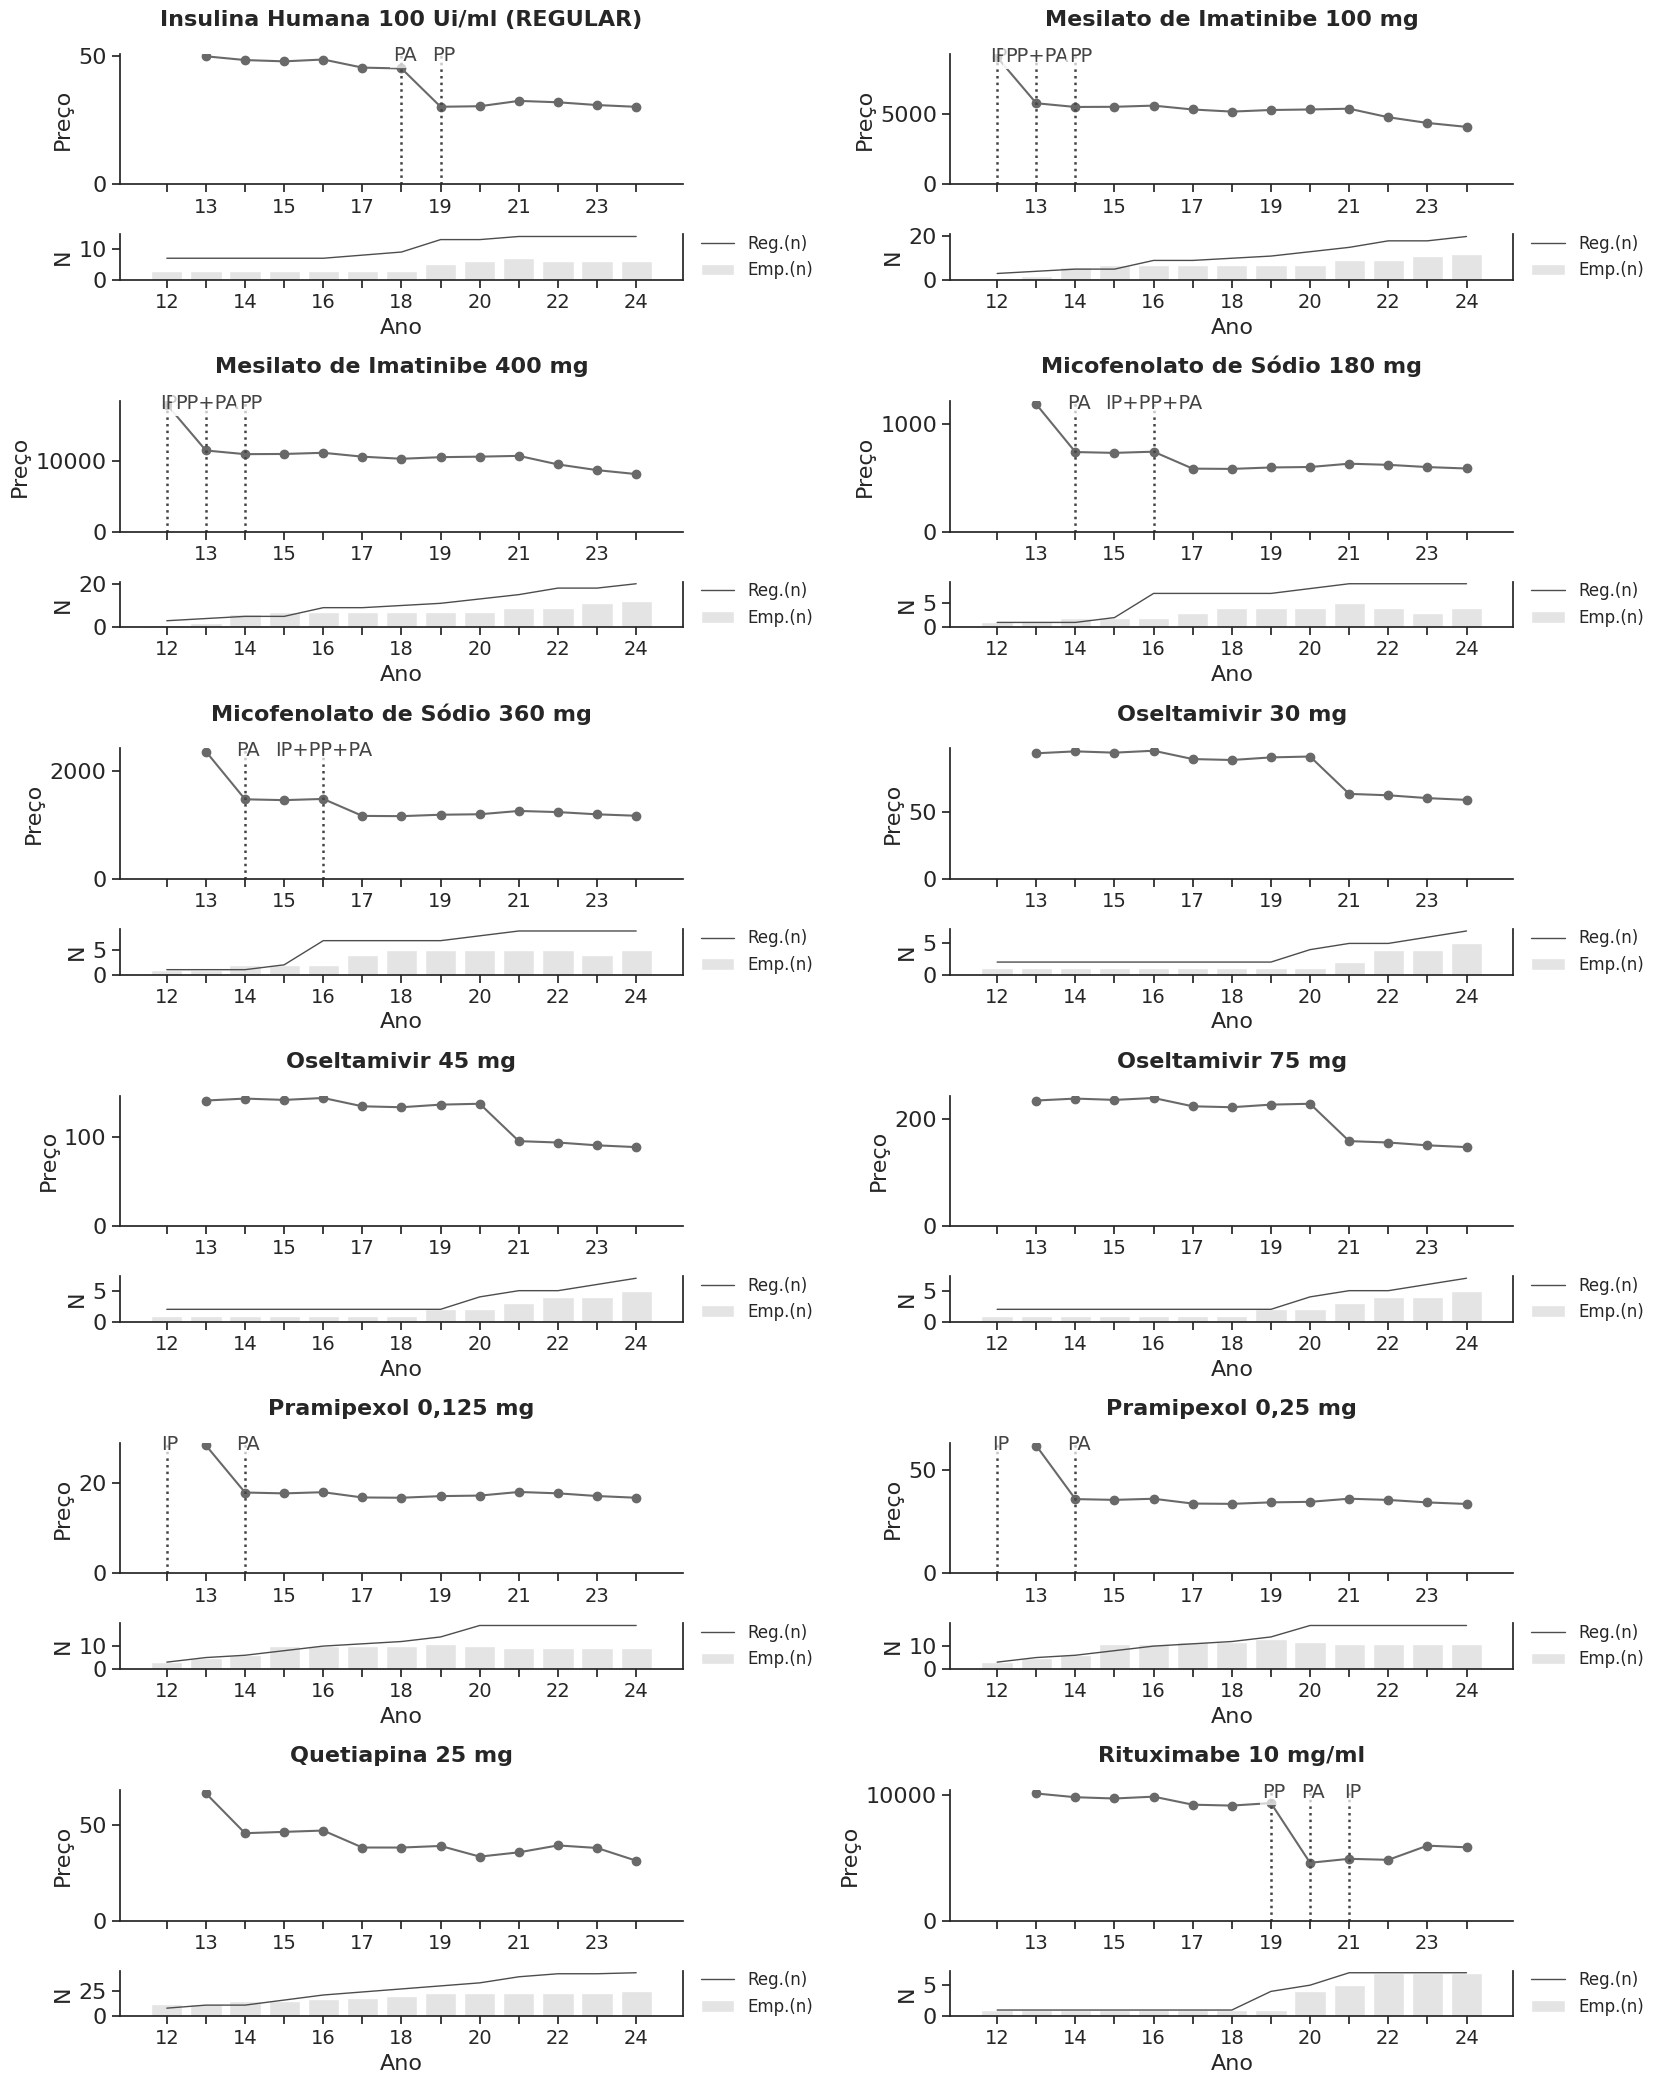

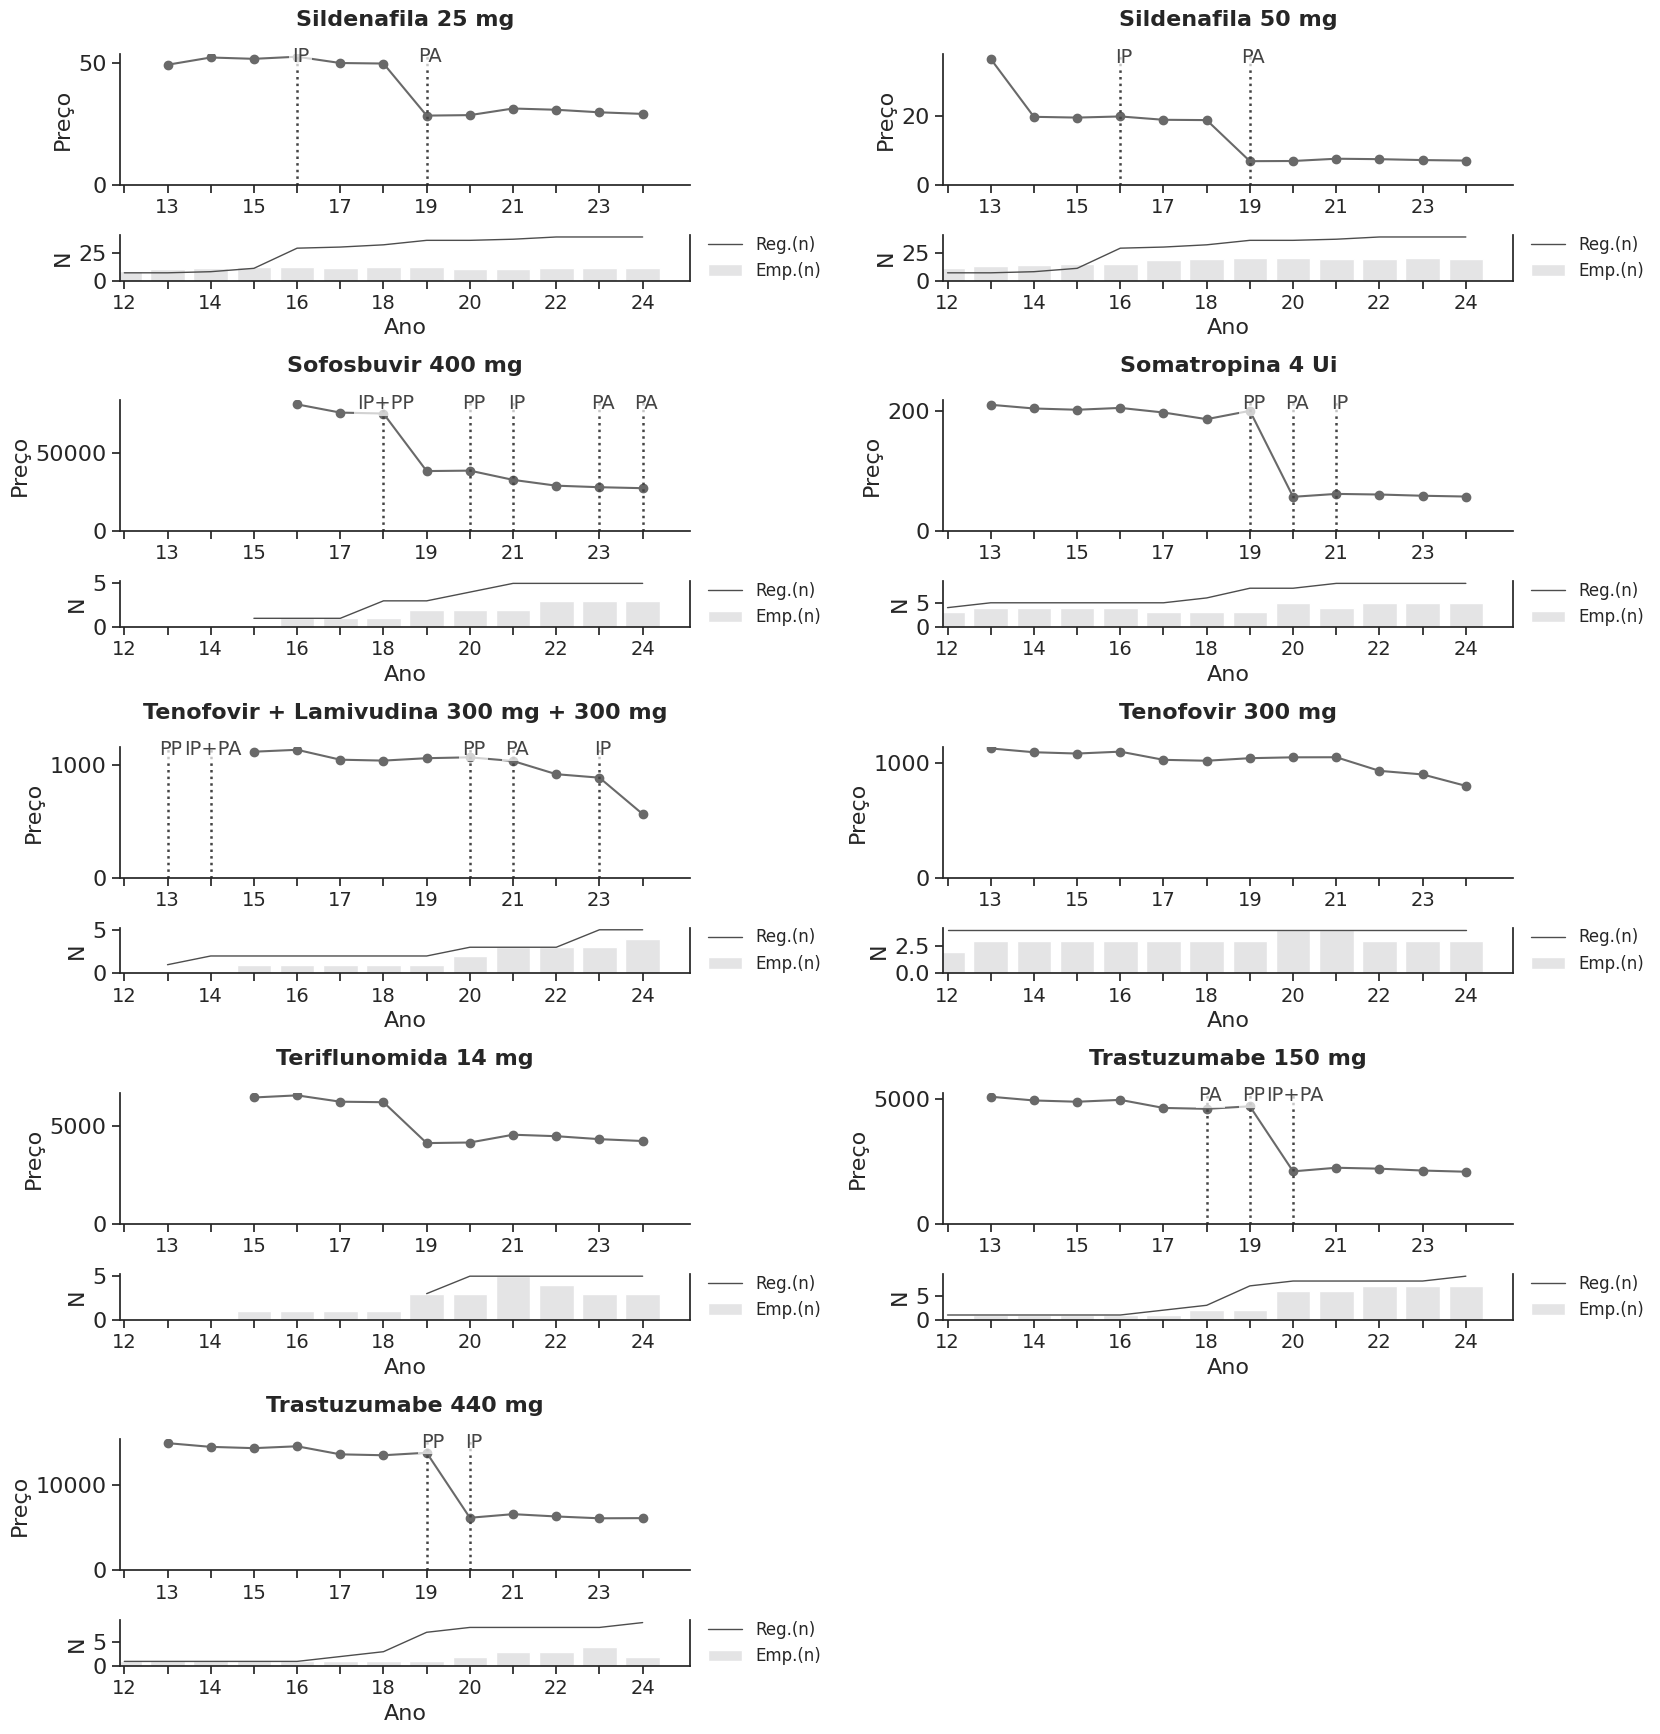

In [17]:
princio_ativo = df_consolidado['Princípio ativo'].unique()
princio_ativo = grupo_r


for i in range(0, len(princio_ativo), 12):
    df = df_consolidado[df_consolidado['Princípio ativo'].isin(princio_ativo[i:i+12])]

    charts = FacetChart(
        df = df,
        col="Princípio ativo",
        hue="Princípio ativo",
        font_config={'fontsize':16},
        df_ano_registro=df_ano_pivot,
        palette="tab20c",
        col_wrap=2,
        height=3.5,
        sharey=False, 
        sharex=True, 
        aspect=2.4,
    )

    charts.subplots(save_file=f'chart_page_grupo_r{i}')
    # 10 3.5 2.4

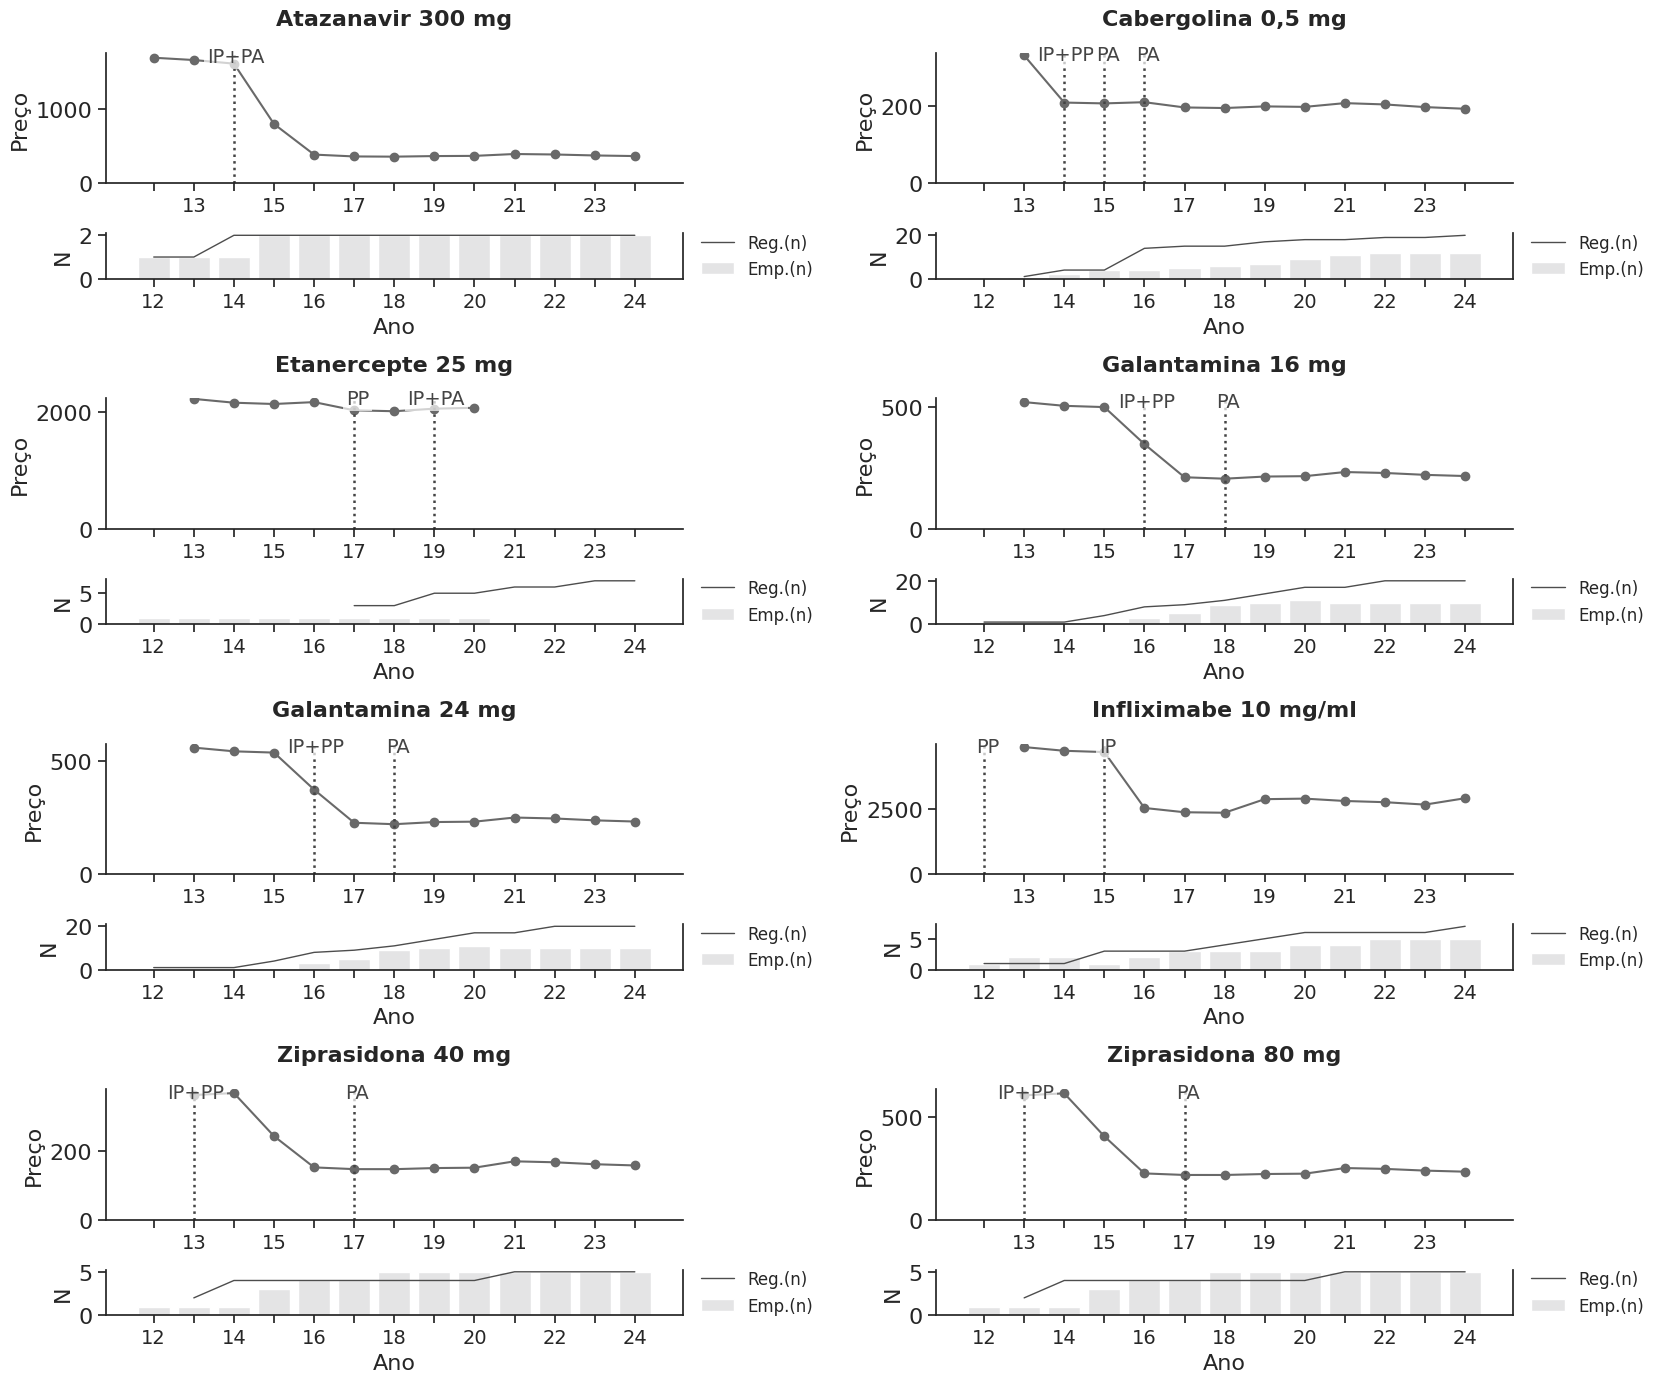

In [18]:
princio_ativo = df_consolidado['Princípio ativo'].unique()
princio_ativo = grupo_rf

for i in range(0, len(princio_ativo), 12):
    df = df_consolidado[df_consolidado['Princípio ativo'].isin(princio_ativo[i:i+12])]

    charts = FacetChart(
        df = df,
        col="Princípio ativo",
        hue="Princípio ativo",
        font_config={'fontsize':16},
        df_ano_registro=df_ano_pivot,
        palette="tab20c",
        col_wrap=2,
        height=3.5,
        sharey=False, 
        sharex=True, 
        aspect=2.4,
    )

    charts.subplots(save_file=f'chart_page_grupo_rf{i}')
    # 10 3.5 2.4

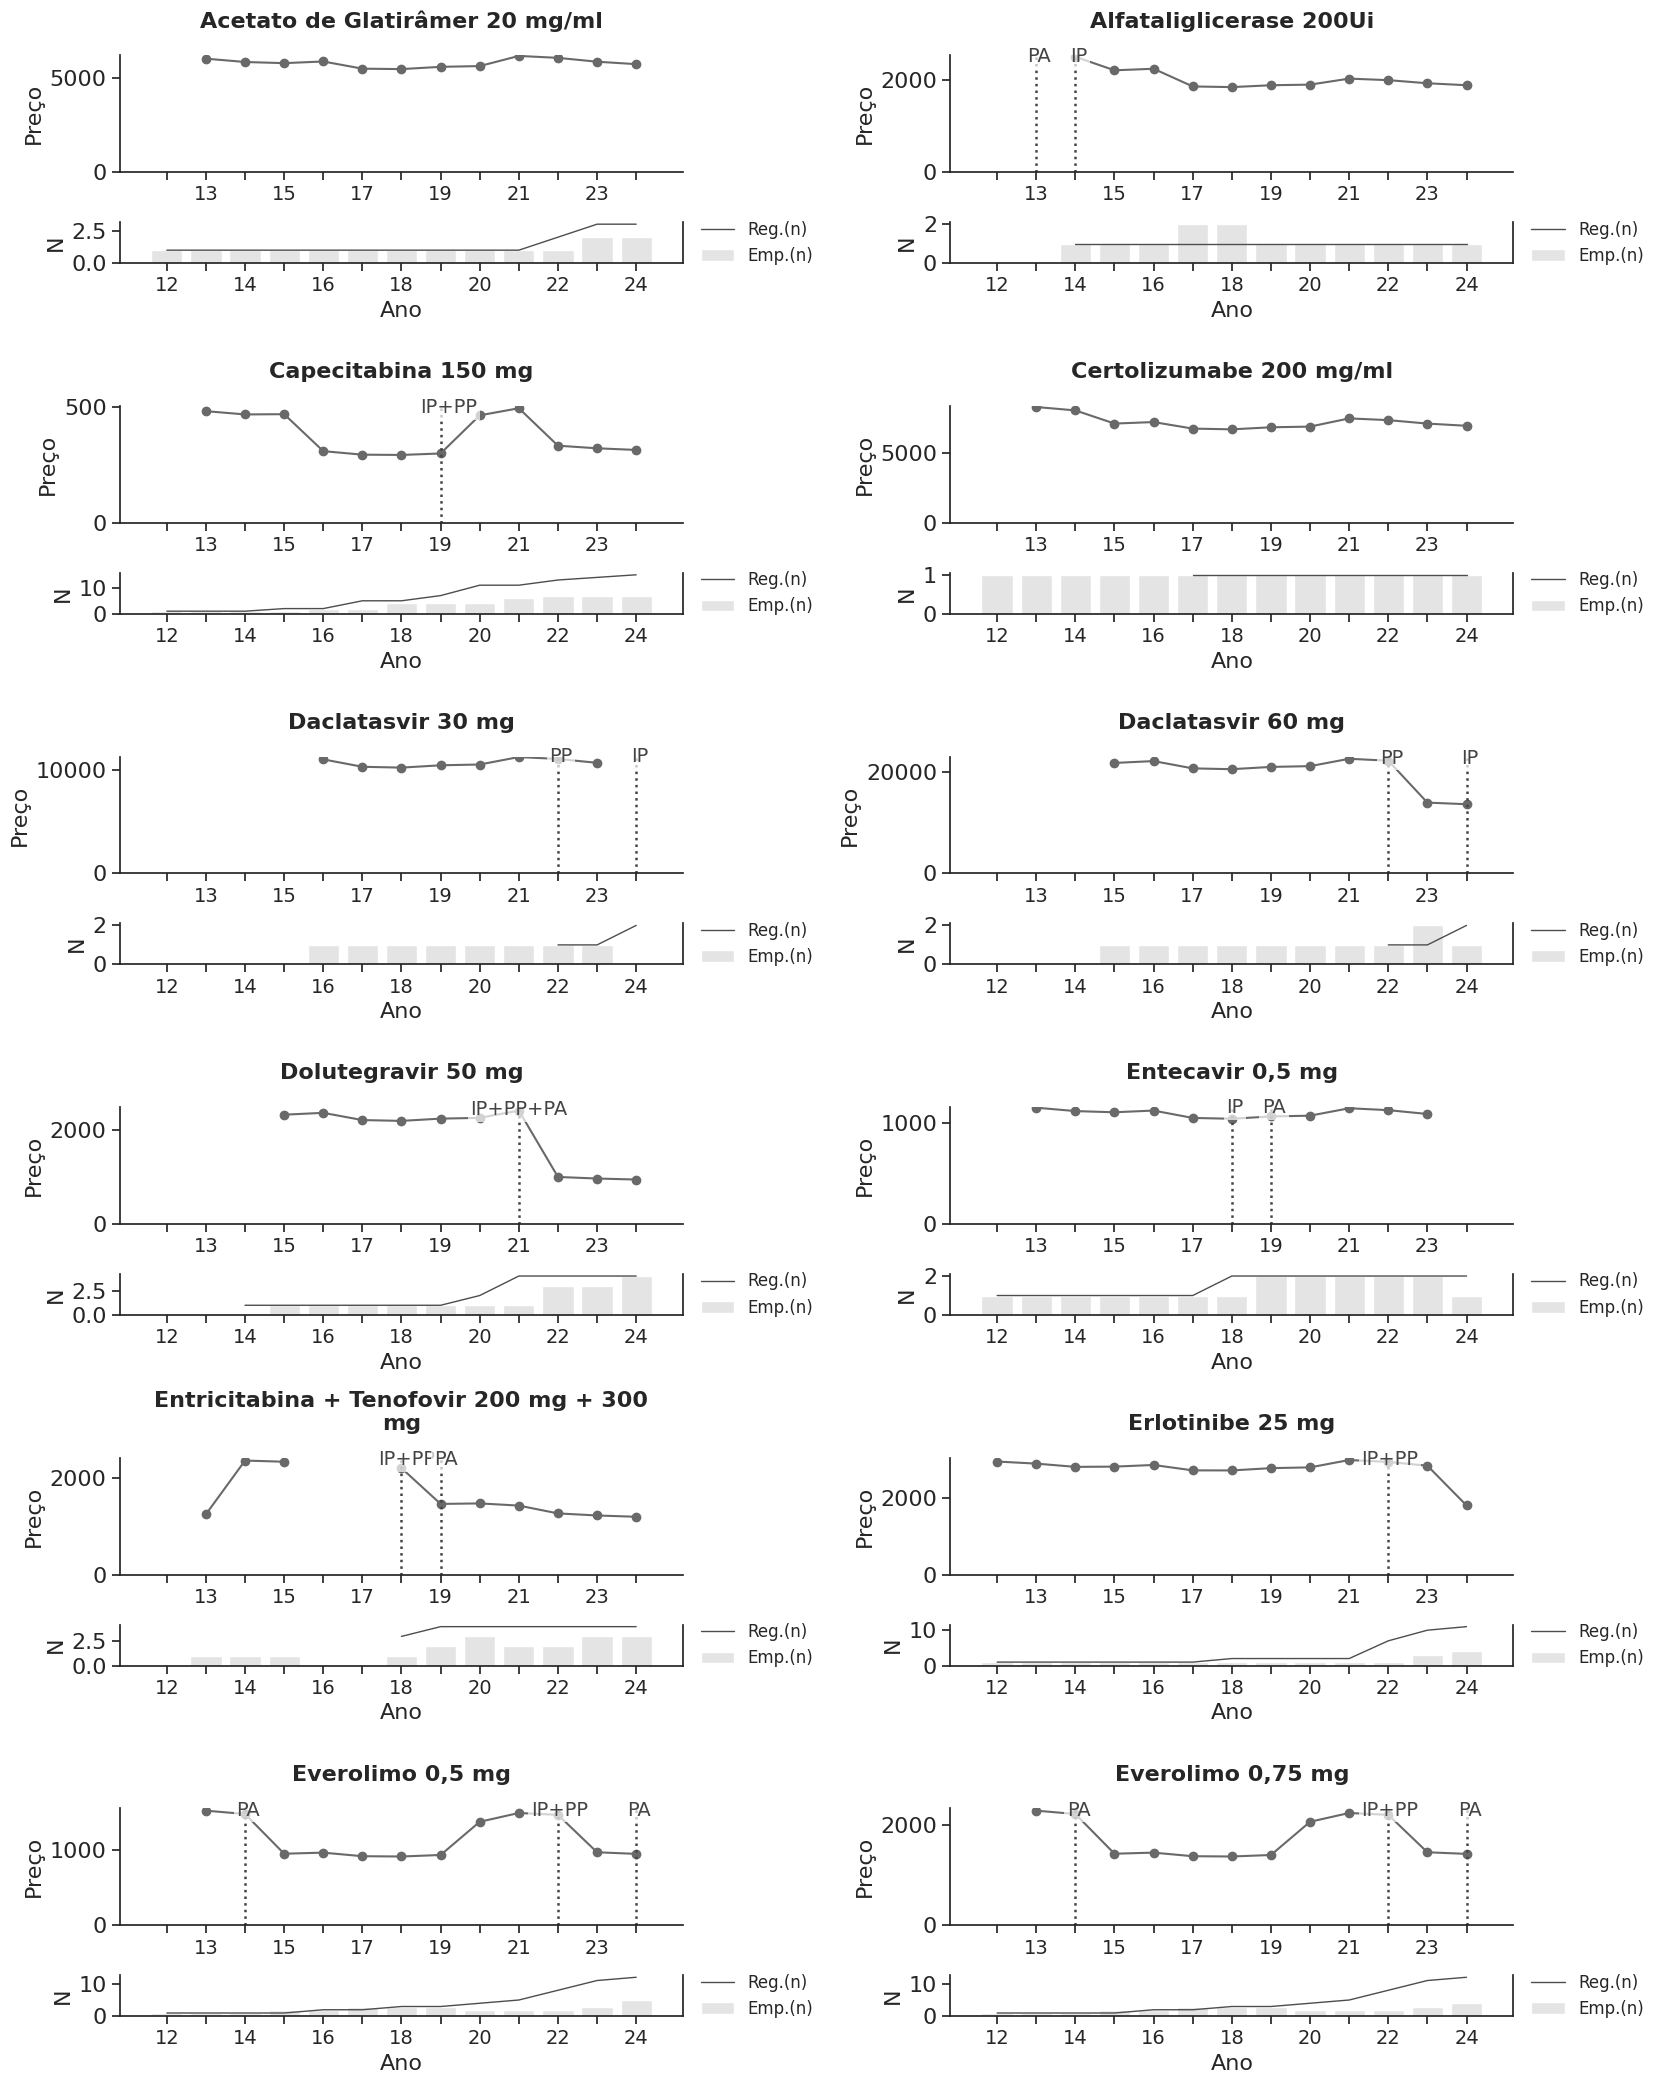

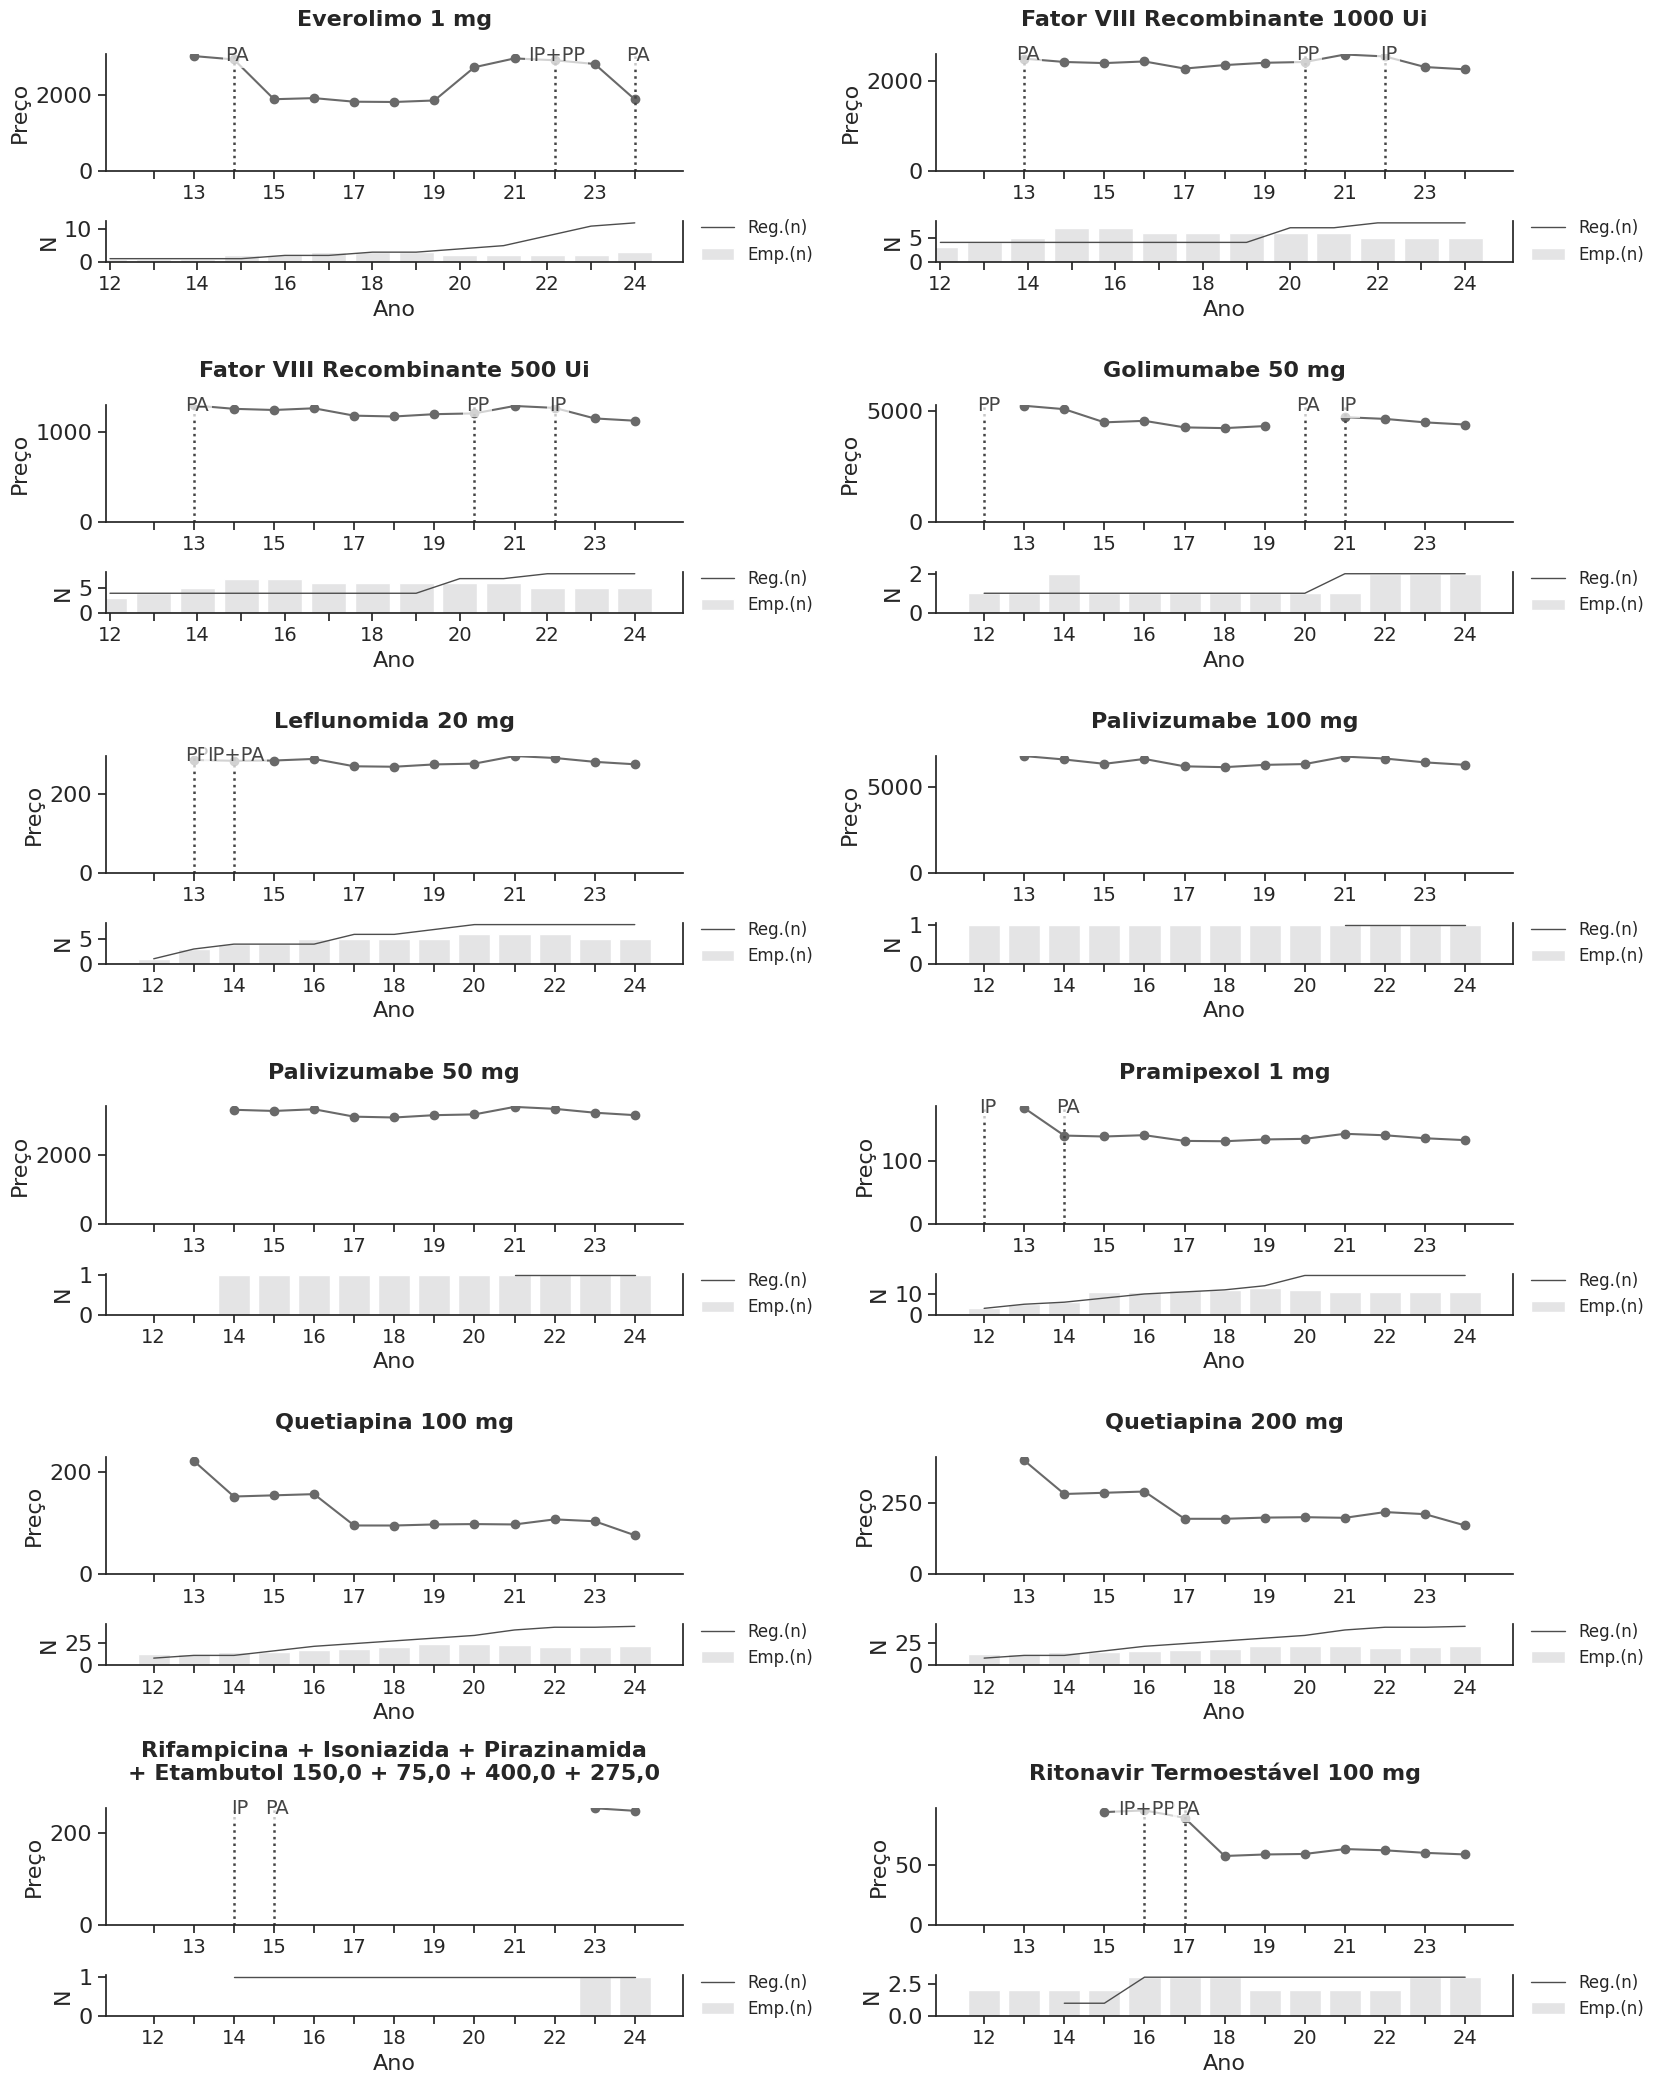

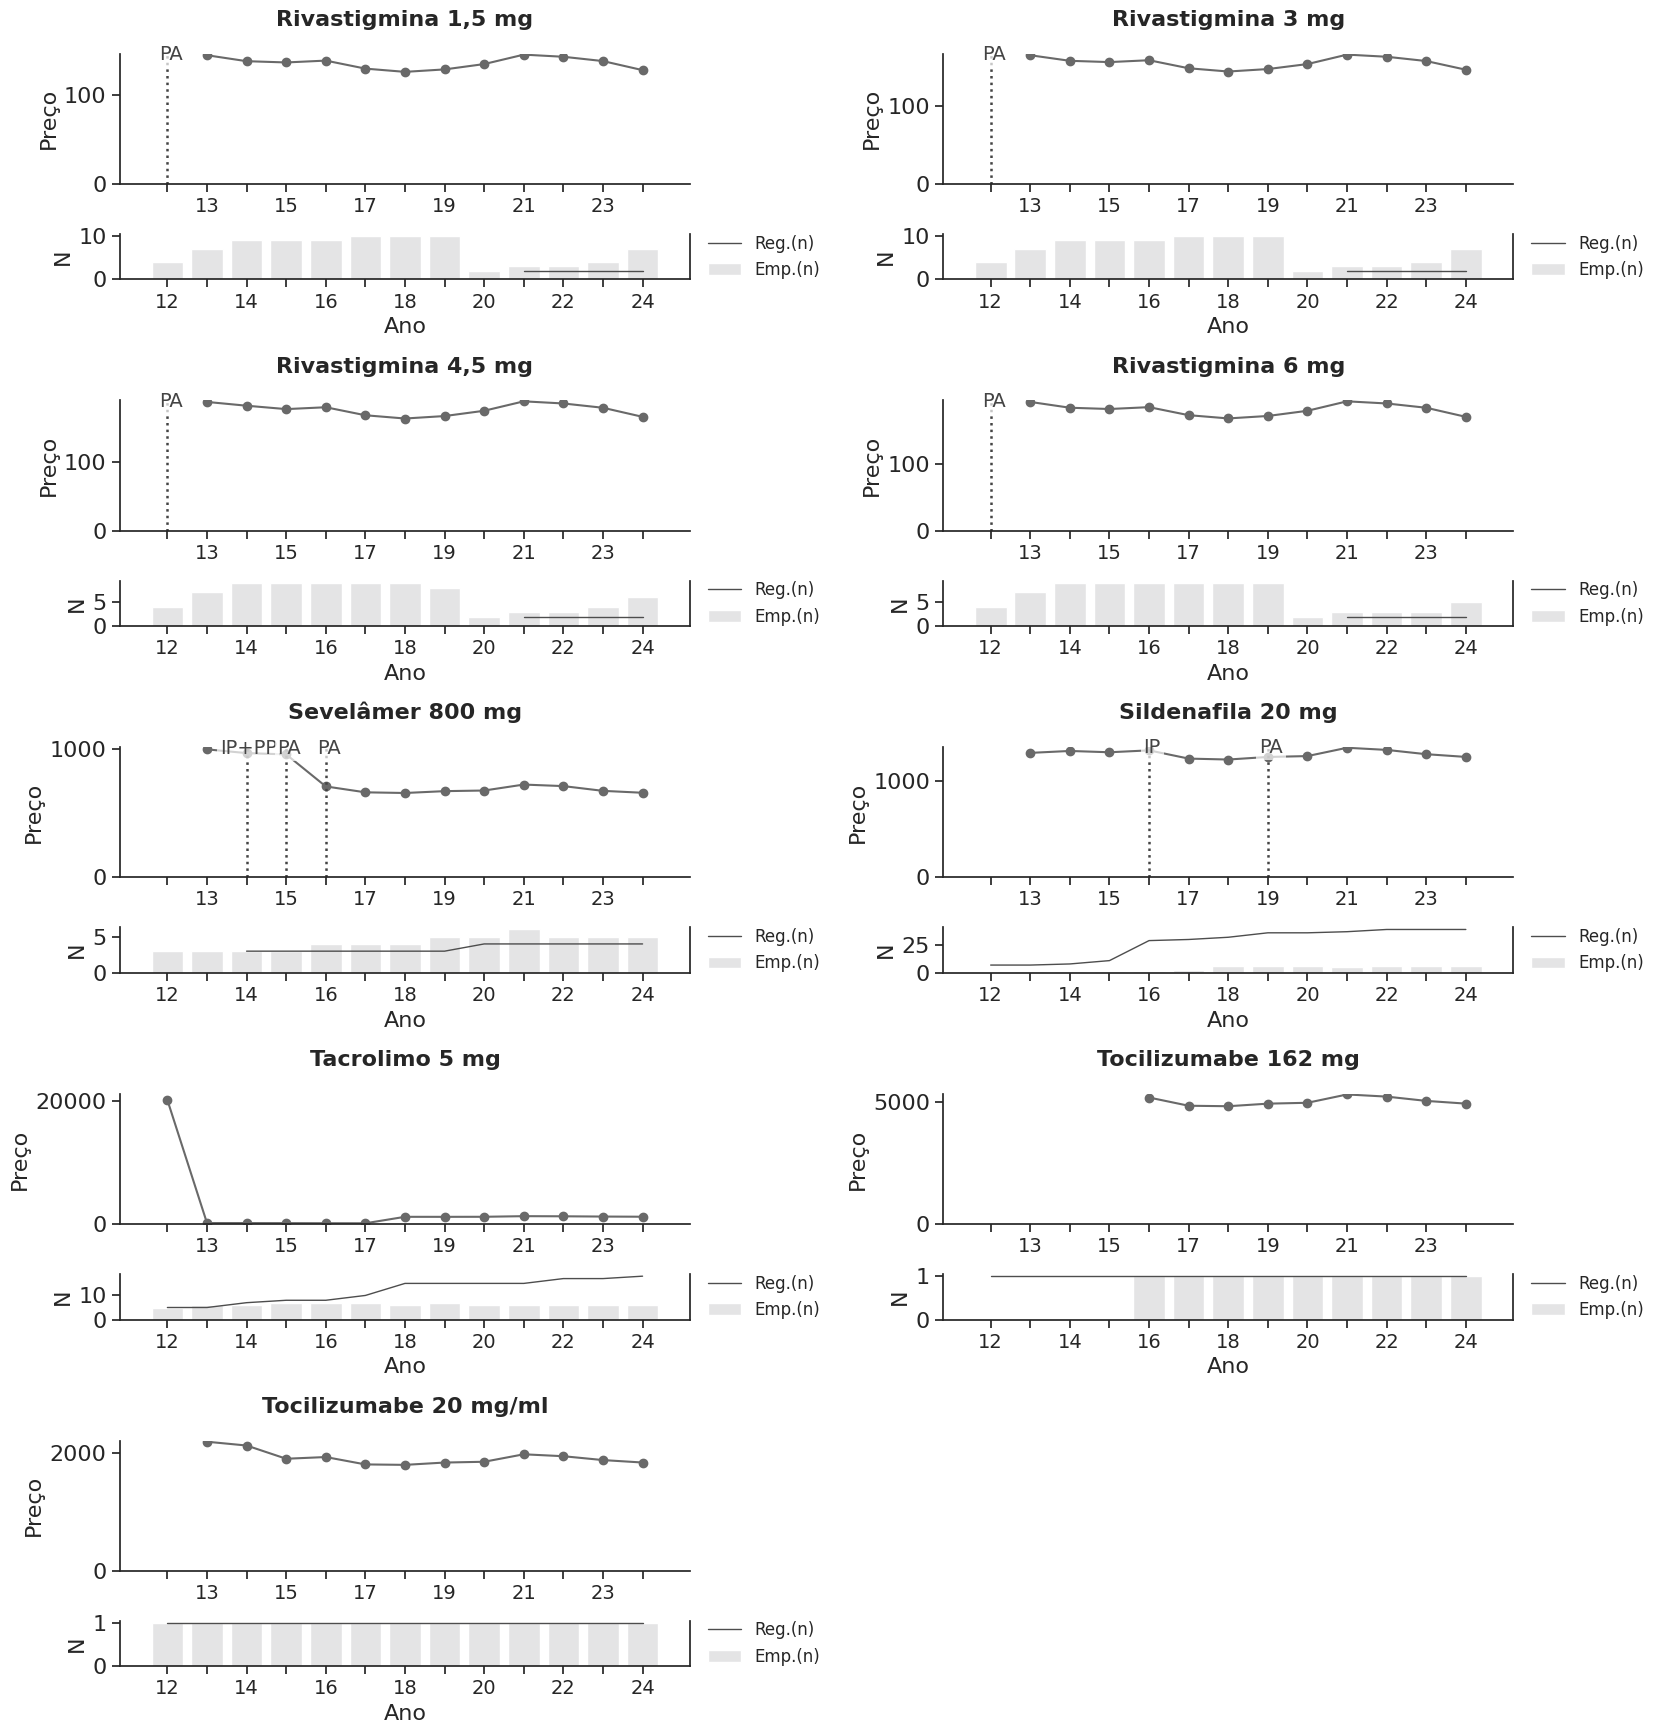

In [19]:
princio_ativo = df_consolidado['Princípio ativo'].unique()
princio_ativo = grupo_fb

for i in range(0, len(princio_ativo), 12):
    df = df_consolidado[df_consolidado['Princípio ativo'].isin(princio_ativo[i:i+12])]

    charts = FacetChart(
        df = df,
        col="Princípio ativo",
        hue="Princípio ativo",
        font_config={'fontsize':16},
        df_ano_registro=df_ano_pivot,
        palette="tab20c",
        col_wrap=2,
        height=3.5,
        sharey=False, 
        sharex=True, 
        aspect=2.4,
    )

    charts.subplots(save_file=f'chart_page_grupo_fb{i}')

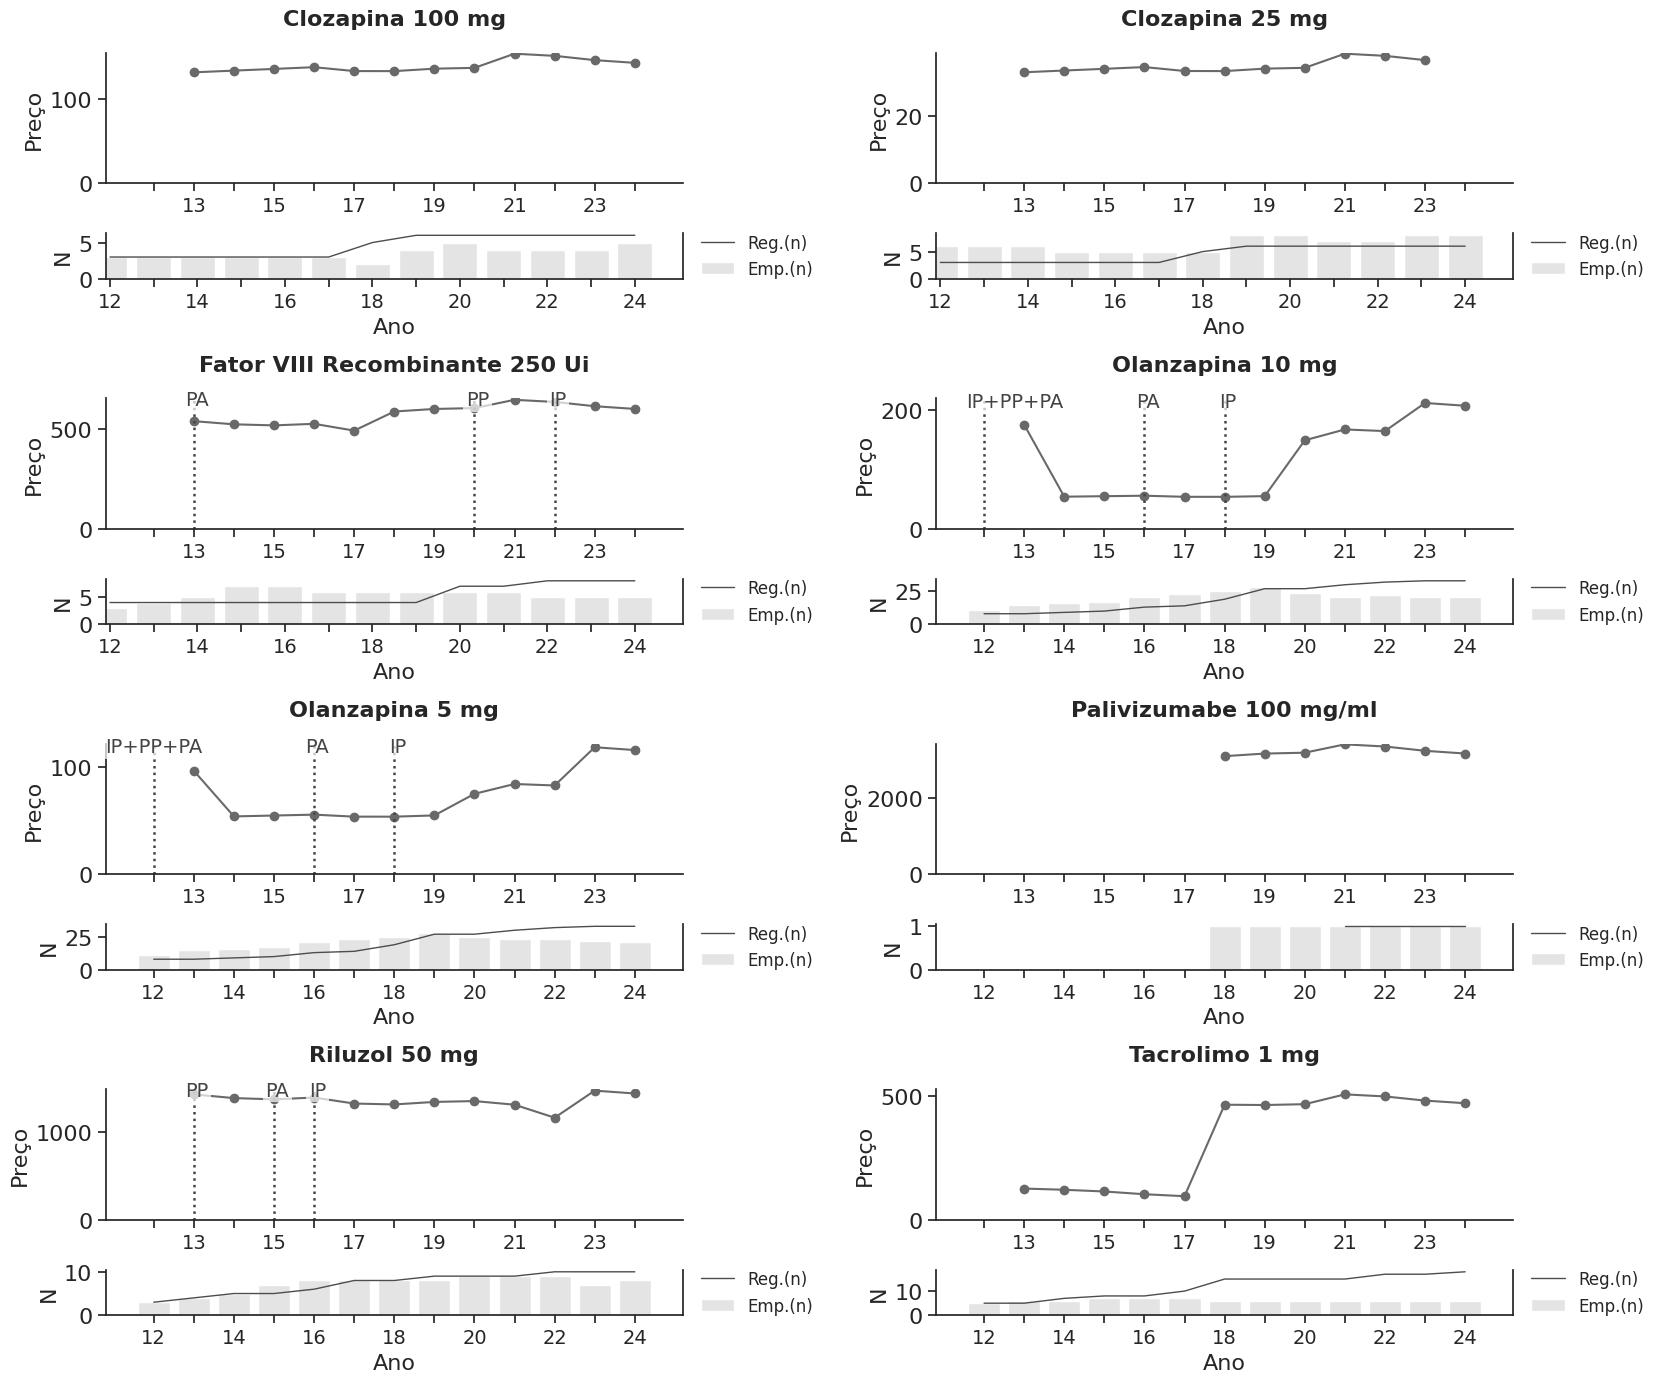

In [20]:
princio_ativo = df_consolidado['Princípio ativo'].unique()
princio_ativo = grupo_fc

for i in range(0, len(princio_ativo), 12):
    df = df_consolidado[df_consolidado['Princípio ativo'].isin(princio_ativo[i:i+12])]

    charts = FacetChart(
        df = df,
        col="Princípio ativo",
        hue="Princípio ativo",
        font_config={'fontsize':16},
        df_ano_registro=df_ano_pivot,
        palette="tab20c",
        col_wrap=2,
        height=3.5,
        sharey=False, 
        sharex=True, 
        aspect=2.4,
    )

    charts.subplots(save_file=f'chart_page_grupo_fc{i}')

## scatterplot

ValueError: data type <class 'numpy.object_'> not inexact

<Figure size 800x500 with 0 Axes>

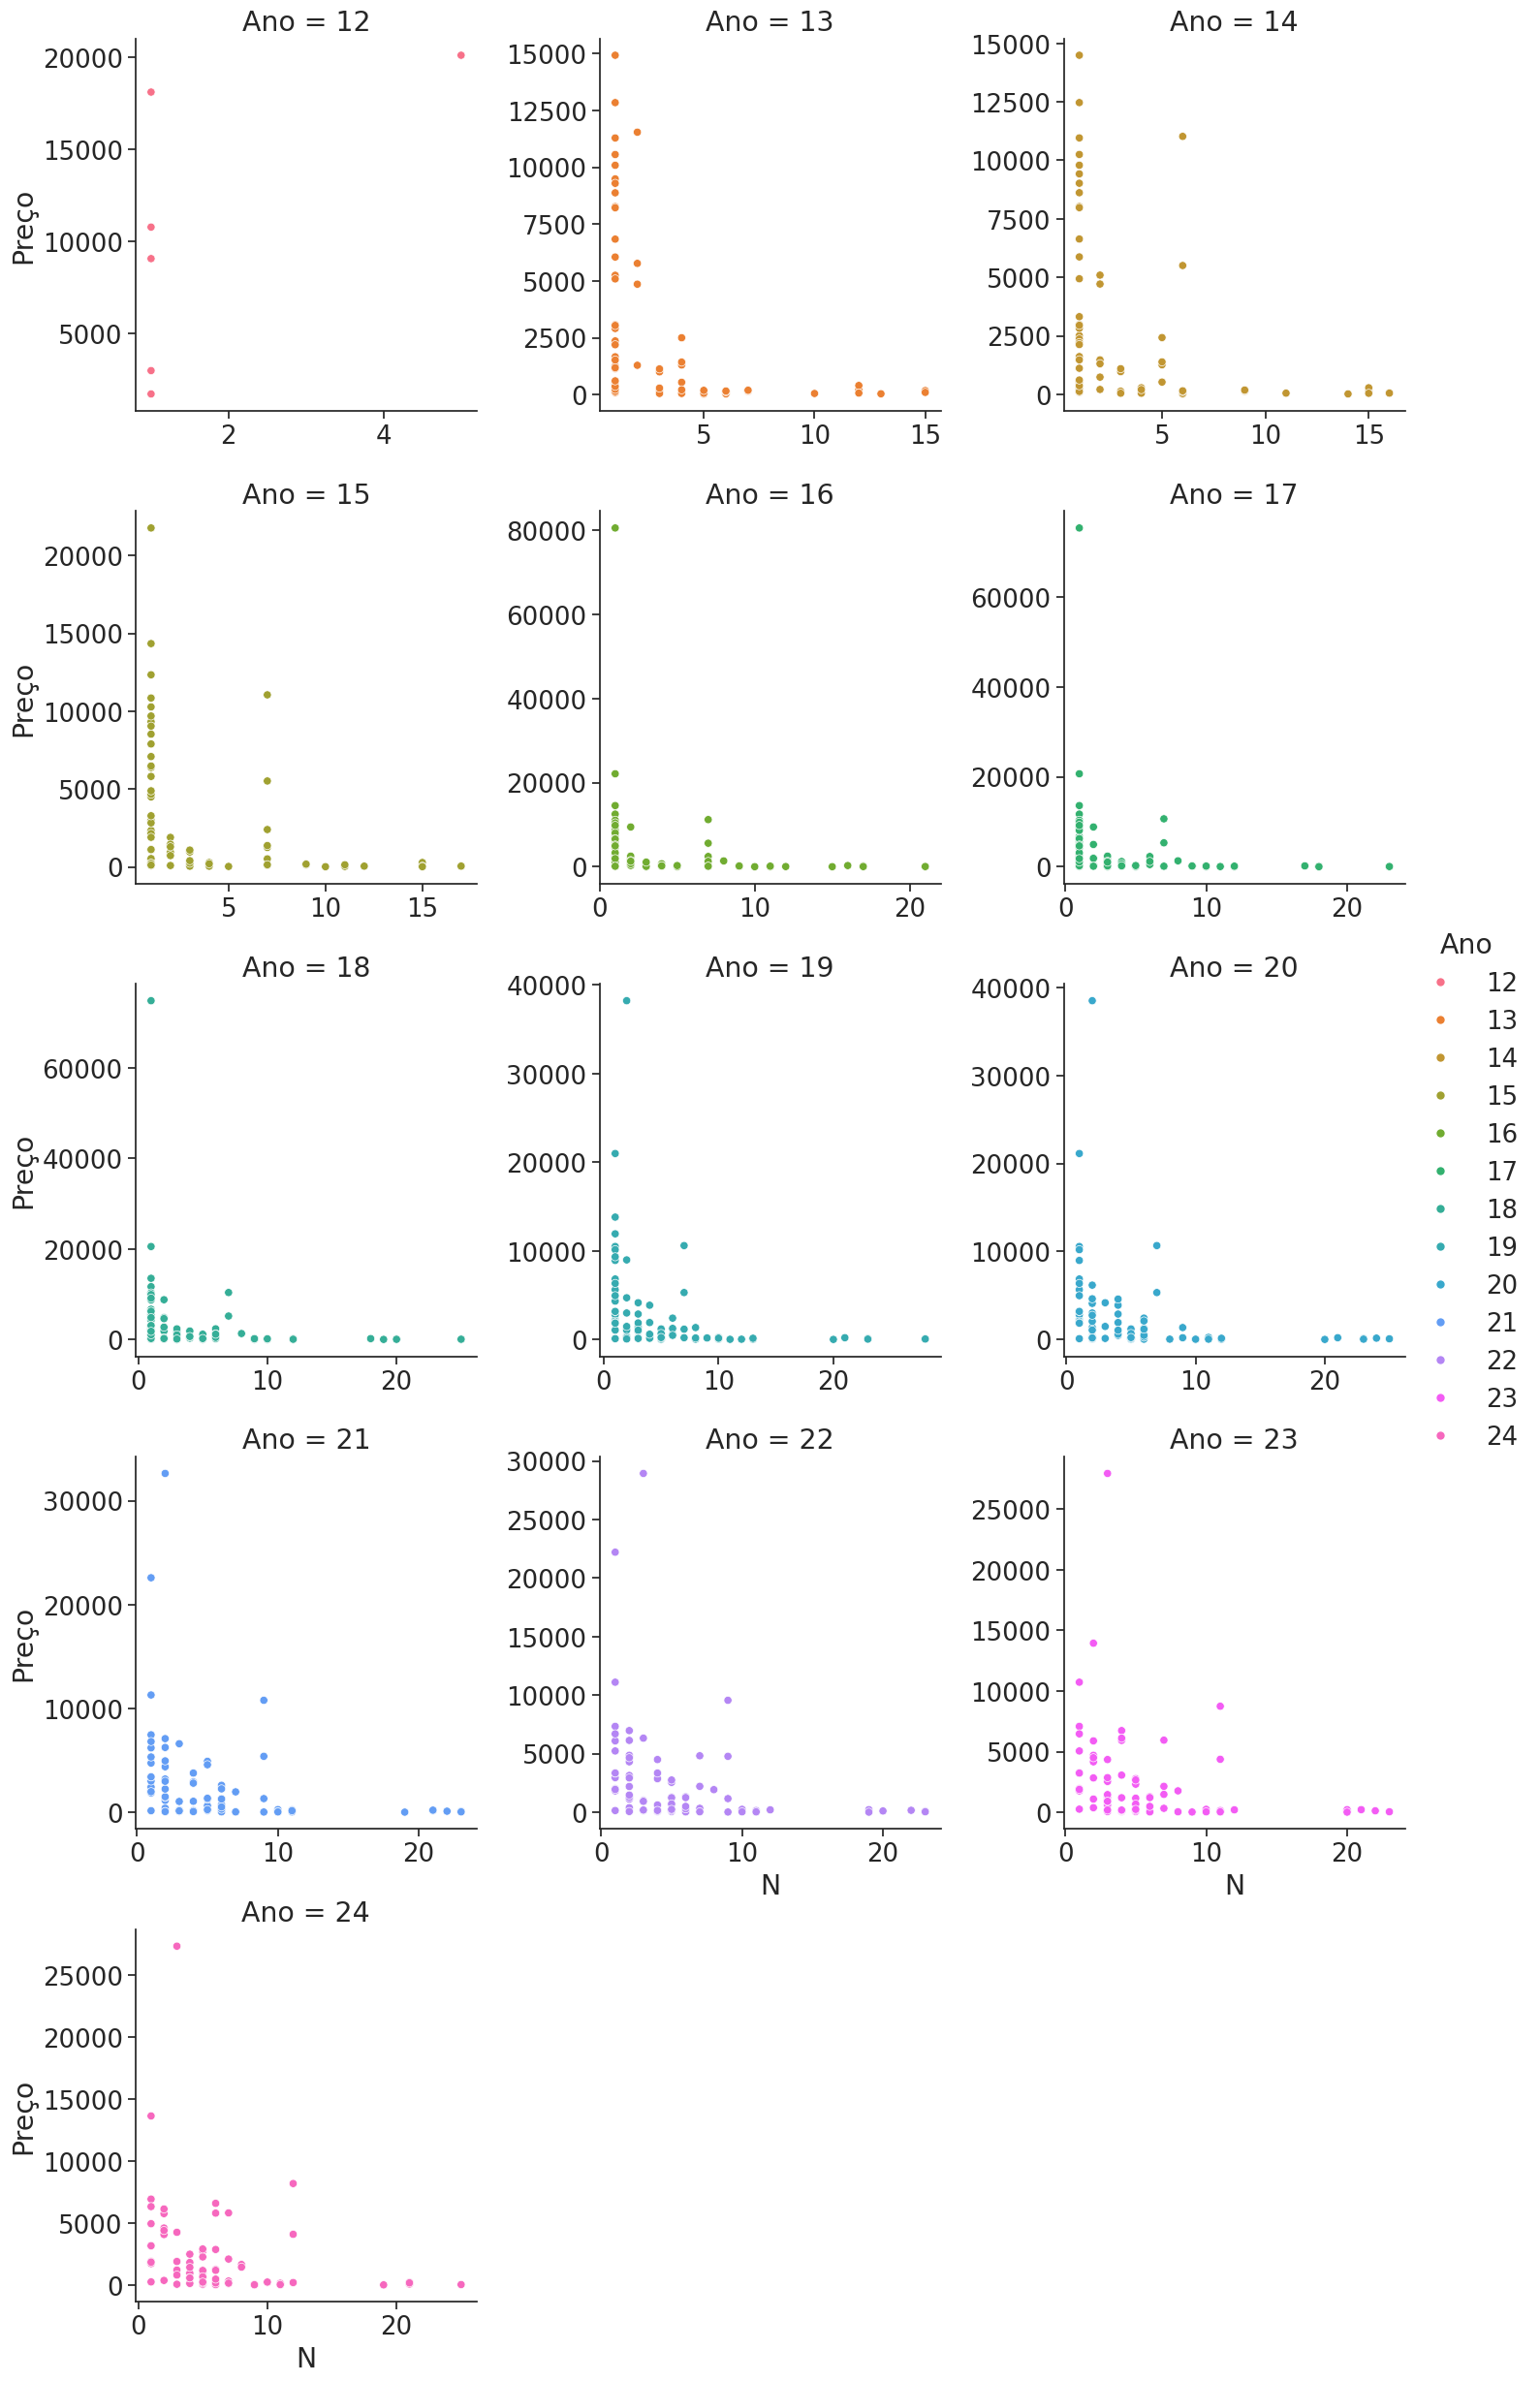

In [20]:
# Criar o gráfico de dispersão
import scipy as sp

sns.set_theme(style="ticks", font_scale=1.7)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['N'], data['Preço'])
    ax = plt.gca()
    ax.text(.1, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes, fontsize=14, verticalalignment="top",)

plt.figure(figsize=(8, 5))
grid = sns.relplot(data=df_consolidado, x="N", y="Preço", hue='Ano', col='Ano', col_wrap=3, facet_kws={'sharey':False, 'sharex':False} )

grid.map_dataframe(annotate)
# Adicionar linha de tendência em cada subplot
for ax in grid.axes.flat:
    sns.regplot(
        data=df_consolidado, 
        x="N", 
        y="Preço", 
        scatter=False,  # Oculta os pontos para evitar duplicação
        ax=ax, 
        color='grey',  # Cor da linha de tendência
        ci=None , # Remove a faixa de confiança,
        line_kws={'linestyle':'dashed', 'alpha':0.6}
    )

grid.figure.suptitle("Relação entre Nº de Laboratorios e Preço por Ano", fontsize=20, y=1.05)  
grid.legend.set_title("")

plt.show()

## Heatmap

In [ ]:


sns.set_theme(style="ticks", font_scale=1)

plt.figure(figsize=(16, 26)) 

# Normalizar os valores por linha (min-max scaling)
df_normalized = df_valor.set_index('Princípio ativo')
df_normalized = df_normalized.sub(df_normalized.min(axis=1), axis=0).div(df_normalized.max(axis=1) - df_normalized.min(axis=1), axis=0)


sns.heatmap(
    df_normalized,
    cmap="Blues",  # Esquema de cores
    linewidths=0.5,  # Linhas entre células
    annot_kws={"size": 12},  # Tamanho da fonte dos valores
    cbar_kws={'label': 'Escala de Cores'}  # Rótulo da barra de cores
    )

## Rede

In [ ]:
df = pd.read_excel('data/fabio.xlsx', sheet_name='categoria_registro', na_values='-')
df.head()

In [ ]:
df_edges = df.groupby(['Empresa',	"Princípio ativo"]).size().reset_index(name='edge_weights')
df_edges

In [ ]:
import networkx as nx

G=nx.from_pandas_edgelist(df_edges, 'Empresa', 'Princípio ativo', edge_attr=True)

plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(G, scale=6)  # Layout forçado
# pos = nx.spring_layout(G)  # Layout forçado

nx.draw(G, pos, with_labels=False, node_color="lightblue", edge_color="gray", connectionstyle="arc3,rad=0.1", arrows=True)

In [ ]:
import networkx as nx

nodes_attr = {}
for i , value in df_edges.iterrows():
    nodes_attr.update({value.iloc[0]:'Empresa', value.iloc[1]:'Principio ativo'}, )
    


G=nx.from_pandas_edgelist(df_edges, 'Empresa', 'Princípio ativo', edge_attr=True)

nx.set_node_attributes(G, nodes_attr, name="tipo")

# Mapeamento de atributos para cores
mapeamento_cores = {
    "Empresa": "#0077b6",
    "Principio ativo": "#808080",
}

# Criar uma lista de cores para os nós com base no atributo
node_color = [mapeamento_cores[G.nodes[node]["tipo"]] for node in G.nodes()]

plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G, k=0.15, iterations=50, seed=1)  # Layout forçado

nx.draw(G, pos, with_labels=False, node_color=node_color, edge_color="#dedede", connectionstyle="arc3,rad=0.1", arrows=True, node_size=150)

import matplotlib.patches as mpatches

# Criar patches para a legenda
patches = [
    mpatches.Patch(color=cor, label=categoria) for categoria, cor in mapeamento_cores.items()
]

# Adicionar legenda personalizada
plt.legend(handles=patches, title="Categorias", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar o grafo
plt.title("Relação entre laboratorios e princípio ativo")
plt.axis("off")
plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()


In [ ]:
//